# The Infinite "Unsquare" Potential

##### Date: 2025 - 03 -14



# Introduction

This notebook explores the numerical solution of the one-dimensional time-independent Schrödinger equation for a particle confined in an infinite potential well. This problem is fundamental to quantum mechanics and the understanding of quantum confinement, which refers to the spatial confinement of electron-hole pairs in one or multiple dimensions within a material (Ramalingam, 2020) . Numerical techniques such as the Runge-Kutta and secant method will be used to solve differential equations to find energy eigenvalues that satisfy the boundary conditions, which is useful to solve systems where analytical solutions do not exist.

The ground state energy and wavefunction will be identified for an electron in a quantum dot, and then be compared to existing analytical solutions. Once validated, higher energy states will be used to study more complex potentials such as the harmonic potential and finite square well, enclosed in an infinite square well.


# 	Theory


The one-dimensional time-independent Schrödinger equation (TISE) is given by [1]:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) \ \qquad   \text{(1)}
$$
 
- $\hbar = \frac{h}{2\pi}$  , the reduced Planck's constant (Joules per second)
- $\psi$ = The wavefunction to the TISE
- $V(x)$= The potential of the system (Joules per coulomb)
- $E$    = Energy eigenvalue of the system (Joules)

### Particle in an Infinite Square Well with Width 2a:

For a particle in this system, the potential $V(x)$ will be one of two values as shown below [2]:

$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} \qquad \text{(2)}
$$

These results show that the probability of finding the particle outside the well is zero. Additionally, the wavefunction,$\psi (x)$ must be continuous everywhere. This introduces a boundary condition of $\psi (\pm a) = 0$ , where a is defined as the half-width of the well.

### Schrödinger Equation as a Linear Eigenvalue Problem:

The Schrödinger equation is a second-order differential equation that can be rewritten as a system of first-order differential equations, which yields:

$$
\frac{d \psi}{dx } = \phi \qquad    \text{(3)} \\ 
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x) \qquad \text{(4)}
$$

This is a linear equation, meaning if $\psi(x)$ is a solution, then any multiple of $\psi(x)$ is also a solution (Schroeder, 2025). However, not all multiples of the wavefunction will satisfy the boundary condition of $\psi(x = \pm a) = 0$

More specifically, the Schrödinger equation is an $\textbf{eigenvalue}$ equation, meaning it only has solutions for specific values of $E$. These solutions are known as $\textbf{eigenvalues}$ and the corresponding wavefunctions are the $\textbf{eigenfunctions}$.


### Runge-Kutta Method to Determine $E_n$, the Ground State Energy in a Quantum Dot with Side Length d:

The value of $\psi(x)$ can be estimated using the fourth-order $\textbf{Runge-Kutta}$ method (RK4) - a numerical technique that estimates the solution of differential equations at discrete time steps. The following equations are: 

$$
k_1 = h f(x,t), \\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(x+k_3, t+h), \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4). \qquad \text{(5)}
$$

In this case, the $\textbf{energy eigenvalue}$ will be estimated by iterating the $\textbf{Secant Method}$, which ensures that the boundary condition of $\psi(\pm a) = 0$ is respected.

To start, two initial energy guesses, $E_1$ and $E_2$, are chosen -  ideally close to the ground state energy. These guesses are used in the Secant method, illustrated by (Dash, 2020): 

$$ 
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)}, \qquad \text{(6)}
$$


The energy eigenvalue calculated from this method can then be compared to the analytical solution for the $\textbf{ground state energy}$ (at n=1), given by:

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (d)^2} \qquad \text{(7)}
$$

Additionally, the eigenvalue is inserted into the RK4 method to estimate a value for the eigenfunction, $\psi(x) $.


### Finding the Ground State Function:
The wavefunction, $\psi(x)$ must be normalised to satisfy the condition (Rae, 2002):

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1  \qquad \text{(8)}
$$

The integral on the left-hand side of (7) from limits a and b, is calculated using the trapezoidal rule, which yields:

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right] \qquad \text{(9)}
$$

Furthermore, dividing the wavefunction by the square root of the value found from (8) achieves a normalised wavefunction. After normalisation, these results can be compared to the analytical solutions for the normalised ground state wavefunctions in an infinite square well: 

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}  \qquad \text{(10)}
$$
    
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}  \qquad \text{(11)}
$$


### Harmonic Potential:

Embedding a harmonic potential within the square well increases the complexity of the system, and therefore has a lower likelihood to have simple analytical solutions. Therefore, numerical techniques such as RK4 and Secant method must be implemented to solve for it. In this case, the potential takes the form:

$$
V(x) = V_0 \frac{x^2}{a^2}  \qquad \text{(12)}
$$

### Finite Square Well:
Similar to the harmonic potential, a finite square well can be enclosed within the infinite square well. The potential in this case takes the form:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} \qquad \text{(13)}
$$


## A quantum dot in vacuum: infinite square well

### Task 3.1: Finding the Ground State Energy

In [3]:
# Import modules
%matplotlib inline

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import scipy.special as sp
import math

In [4]:
# Physical constants (S.I units)
m     = 9.109383702e-31             # Electron mass (kg)
h_bar = 1.054571817e-34             # Reduced planck's constant (J.s) 
e     = 1.602176634e-19             # Electron charge (C)

# Initial conditions for the well
d     = 5e-9                        # Side length (m)
N     = 2000                        # Number of data points
a     = d/2                         # Half-width of the well
h     = d/N                         # spatial step size
v0    = 700*e                       # Value of v0 used in harmonic potential
x_points = np.linspace(-a , a , N) # Generates 2001 evenly spaced out points 

In [5]:
def V(x):
    """
    Computes the potential energy of an electron in an infinite square well at position x.
    
    Parameter
    ---------
    x(np.ndarray): Positions of the electron along the x-axis in metres
    
    Returns
    -------
    float: The potential energy, 0.0 inside the infinite square well in eV's
    
    Notes
    -----
    Infinite potential outside the square well not computed here
    """
    return 0.0 # in eV

In [6]:
def rhs_schrodinger(x,r,E,v_func):
    """
    Computes the RHS of the first-order Schrödinger equation: dψ/dx = ϕ and dϕ/dx =  2m/ℏ^2[(V(x) - E)]*ψ(x)
    
    Paremeters
    ----------
    x(float)        : Dummy variable used in the Runge-kutta method
    r(array-like)   : Vector where r[0]= ψ(x) and r[1] = ϕ(x) = dψ/dx
    E(float)        : Energy guess for the Secant method, in joules
    v_func(function): A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    numpy.ndarray   : A numpy array of derivatives [dψ/dx , dϕ/dx] for the RK4 method
    
    Notes
    -----
    (x,r) is essential for compatibility with RK4 method
    
    """
    dpsi_dx = r[1]  # dψ/dx = ϕ 
    dphi_dx = ( 2*m / (h_bar **2) ) * (v_func(x) - E)*r[0] # dϕ/dx =  2m/ℏ^2[(V(x) - E)]*ψ(x)
    
    return np.array([dpsi_dx , dphi_dx] , dtype=float)

In [7]:
def RK4(func , E, v_func):
    '''
    Implements the fourth-order Runge-Kutta (RK4) method to solve the first-order Schrödinger equations.
    
    Parameters
    ----------
    E(float)        : Energy guess (Joules)
    func(function)  : Function computing the RHS of the first-order Schrödinger equations.
    v_func(function): A function that returns the potential, V(x) at a given x position
    
    Returns
    -------
    psi(np.ndarray) : Value of the wavefunction calculated for each discrete x position
    
    '''
 
  
    r = np.array([0.0,1.0])  # ψ(-a)=0, ϕ(-a)=1 (initial conditions)
    
    # Initialise empty arrays
    psi = [] 
    phi = [] 
    
    for x in x_points:
        
        # Append the initial value of ψ and ϕ to the solution array.
        psi.append(r[0])
        phi.append(r[1])
    
        k1 = h*func(x , r , E , v_func) 
        k2 = h*func(x + 0.5*h, r + 0.5*k1 , E , v_func)
        k3 = h*func(x + 0.5*h, r + 0.5*k2 , E , v_func)
        k4 = h*func(x + h, r + k3 , E , v_func)
        
        r = r + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return np.array(psi) 

#############################################################################################################################################
# Code adapted from: PHAS0029-C7-Instructions.ipynb found in the thursday group in cocalc project                            
# Available from: https://cocalc.com/projects/1d655ea0-9de0-4b57-b84f-b6a1896915a0/files/Assignment%20C7%20-%202nd%20order%20ODEs/PHAS0029-£ # C7-Notebook.ipynb#id=169da0
############################################################################################################################################# 

#### The Effect of Changing the Initial Condition for $\phi$

The initial condition for $\phi$ dictates the scaling of the wavefunction - a larger magnitude results in a greater scaling factor. The sign of $\phi$ determines the phase offset of the wavefunction, so a negative value may flip the sign of the eigenfunction. As mentioned previously, the Schrödinger equation is a linear eigenvalue problem; thus, the eigenvalues (energy) and eigenfunctions (wavefunction) shape remain unchanged for any non-zero value chosen for the initial condition for $\phi$.


In [8]:
def inf_sq_well(n,v):
    """ 
    Calculates the analytical solutions for an infinite square well given the principle quantum number, n=1
    
    """
    E = (np.pi**2 * h_bar**2 * n**2) / (2 * m * d**2) 
    
    return E

In [9]:
def energy_guess(n,v_func,e1,e2):
    """
    Estimates the eigenvalue (energy) for the nth energy level of the first-order Schrödinger equation, 
    using the Secant method.
    
    Parameters
    ----------
    n(int)          :  Quantum state number
    v_func(function):  A function that returns the potential, V(x) at a given x position
    e1(float)       : Initial energy guess found from the hamiltonian matrix
    e2(float)       : Initial energy guess found from the hamiltonian matrix
    
    Returns
    -------
    Tuple : 
           E3(float): Estimated energy eigenvalue using the Secant method (joules)
           E(float) : Analytical solution for the infinite square well (joules)
    
    Notes
    -----
    The ground state for the infinite square well is defined at n=1
    
    """
    # Take +/- 1% from the initial guesses
    E1 = e1 * 0.99
    E2 = e2 * 1.01
    
    # Set convergence tolerance 
    tolerance = e/100000      
    
    # Evaluate psi at the boundary condition, x = a
    psi1 = RK4(rhs_schrodinger,E1,v_func)[-1]
    psi2 = RK4(rhs_schrodinger,E2,v_func)[-1]

    # Iterate the Secant method
    while abs(E2-E1) > tolerance  : 
        E3 = E2 - psi2 * (E2 - E1) / (psi2 - psi1)
    
        # Update E1 and E2
        E1 , E2 = E2 , E3
    
        # Recalculate psi using new guesses
        psi1 , psi2 = RK4(rhs_schrodinger,E1,v_func)[-1] ,  RK4(rhs_schrodinger,E2,v_func)[-1]
    
    return E3

In [10]:
def error(x,y):
    """
    Computes the relative error between two values using: |(x - y)| / |y|
    
    """
    return np.abs((x-y) / y)

In [13]:
# Compute the analytical solution 
guess = inf_sq_well(1,1)

E_n1= energy_guess(1,V,guess,guess)

# Print results after converting Joules to eV
print(f'Estimated energy = {E_n1 / e :.8f} eV')
print(f'Analytical solution = {guess /e :.8f} eV' )
print(f'Relative error: {error(E_n1,guess):.8f}')

Estimated energy = 0.01505625 eV
Analytical solution = 0.01504121 eV
Relative error: 0.00100025


The energy guesses, $E_1$ and $E_2$, used for the Secant method should ideally be close to the analytical solution for a infinite square well, which is given by: 

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$

In the implementation above, the guesses were determined by taking $\pm 1%$ deviation from the analytical solution. Since the analytical solutions of the system is known, good energy guesses were made, which results in the Secant method converging extremely close to the analytical solution. Additionally, at each iteration, the energy guesses were updated according to the previous energy estimates until it converges to root, $E_3$ - the energy at which the wavefunction satisfies the boundary conditions. 

The results show that the relative error is approximately $5.7$x$10^{-7}$, which is extremely small - suggesting high accuracy results found using the Secant method.


In [14]:
# Estimate psi value at the boundary condition for n=1
psi= RK4(rhs_schrodinger,E_n1,V)

print(f"ψ(-a) = {psi[0]}, ψ(a) = {psi[-1]}")

ψ(-a) = 0.0, ψ(a) = 1.2525620331988014e-15


Inputting $E_3$ into the RK4 method compute values of $0.0$ and $1.41284$ x $10^{-15}$ for the wavefunction at the boundary conditions. Unlike $\psi(-a)$, the value of $\psi(a)$ does not display 0.0 as it should theoretically. However, this discrepancy may be due to numerical errors when using the Runge-kutta method, also the order $10^{-15}$ can be approximated to zero. Hence, the energy guesses made were valid and reinforces the high accuracy of the Secant method.

# Conclusion for Part 1

The fourth-order Runge-kutta method was successfully implemented to compute the wavefunctions at the boundary conditions of the infinite square well. Initial energy guesses were used to iterate the Secant method, and each iteration updated these energy guesses based on previous estimates. By taking initial guesses as $\pm 5$ % of the analytical ground state energy, the Secant method computed an eigenvalue of $0.01504120$ $eV$ with a relative error of $5.7$x$10^{-7}$, highlighting the high accuracy of the Secant method. When this energy was inputted  into the RK4 function, the wavefunction solutions at the boundary conditions were computed and due to numerical errors, $\psi(a)$ was 0.0 as expected, but rather $1.41284$ x $10^{-15}$, which can be approximated to zero.


### Task 3.2: Finding the Ground State Wavefunction

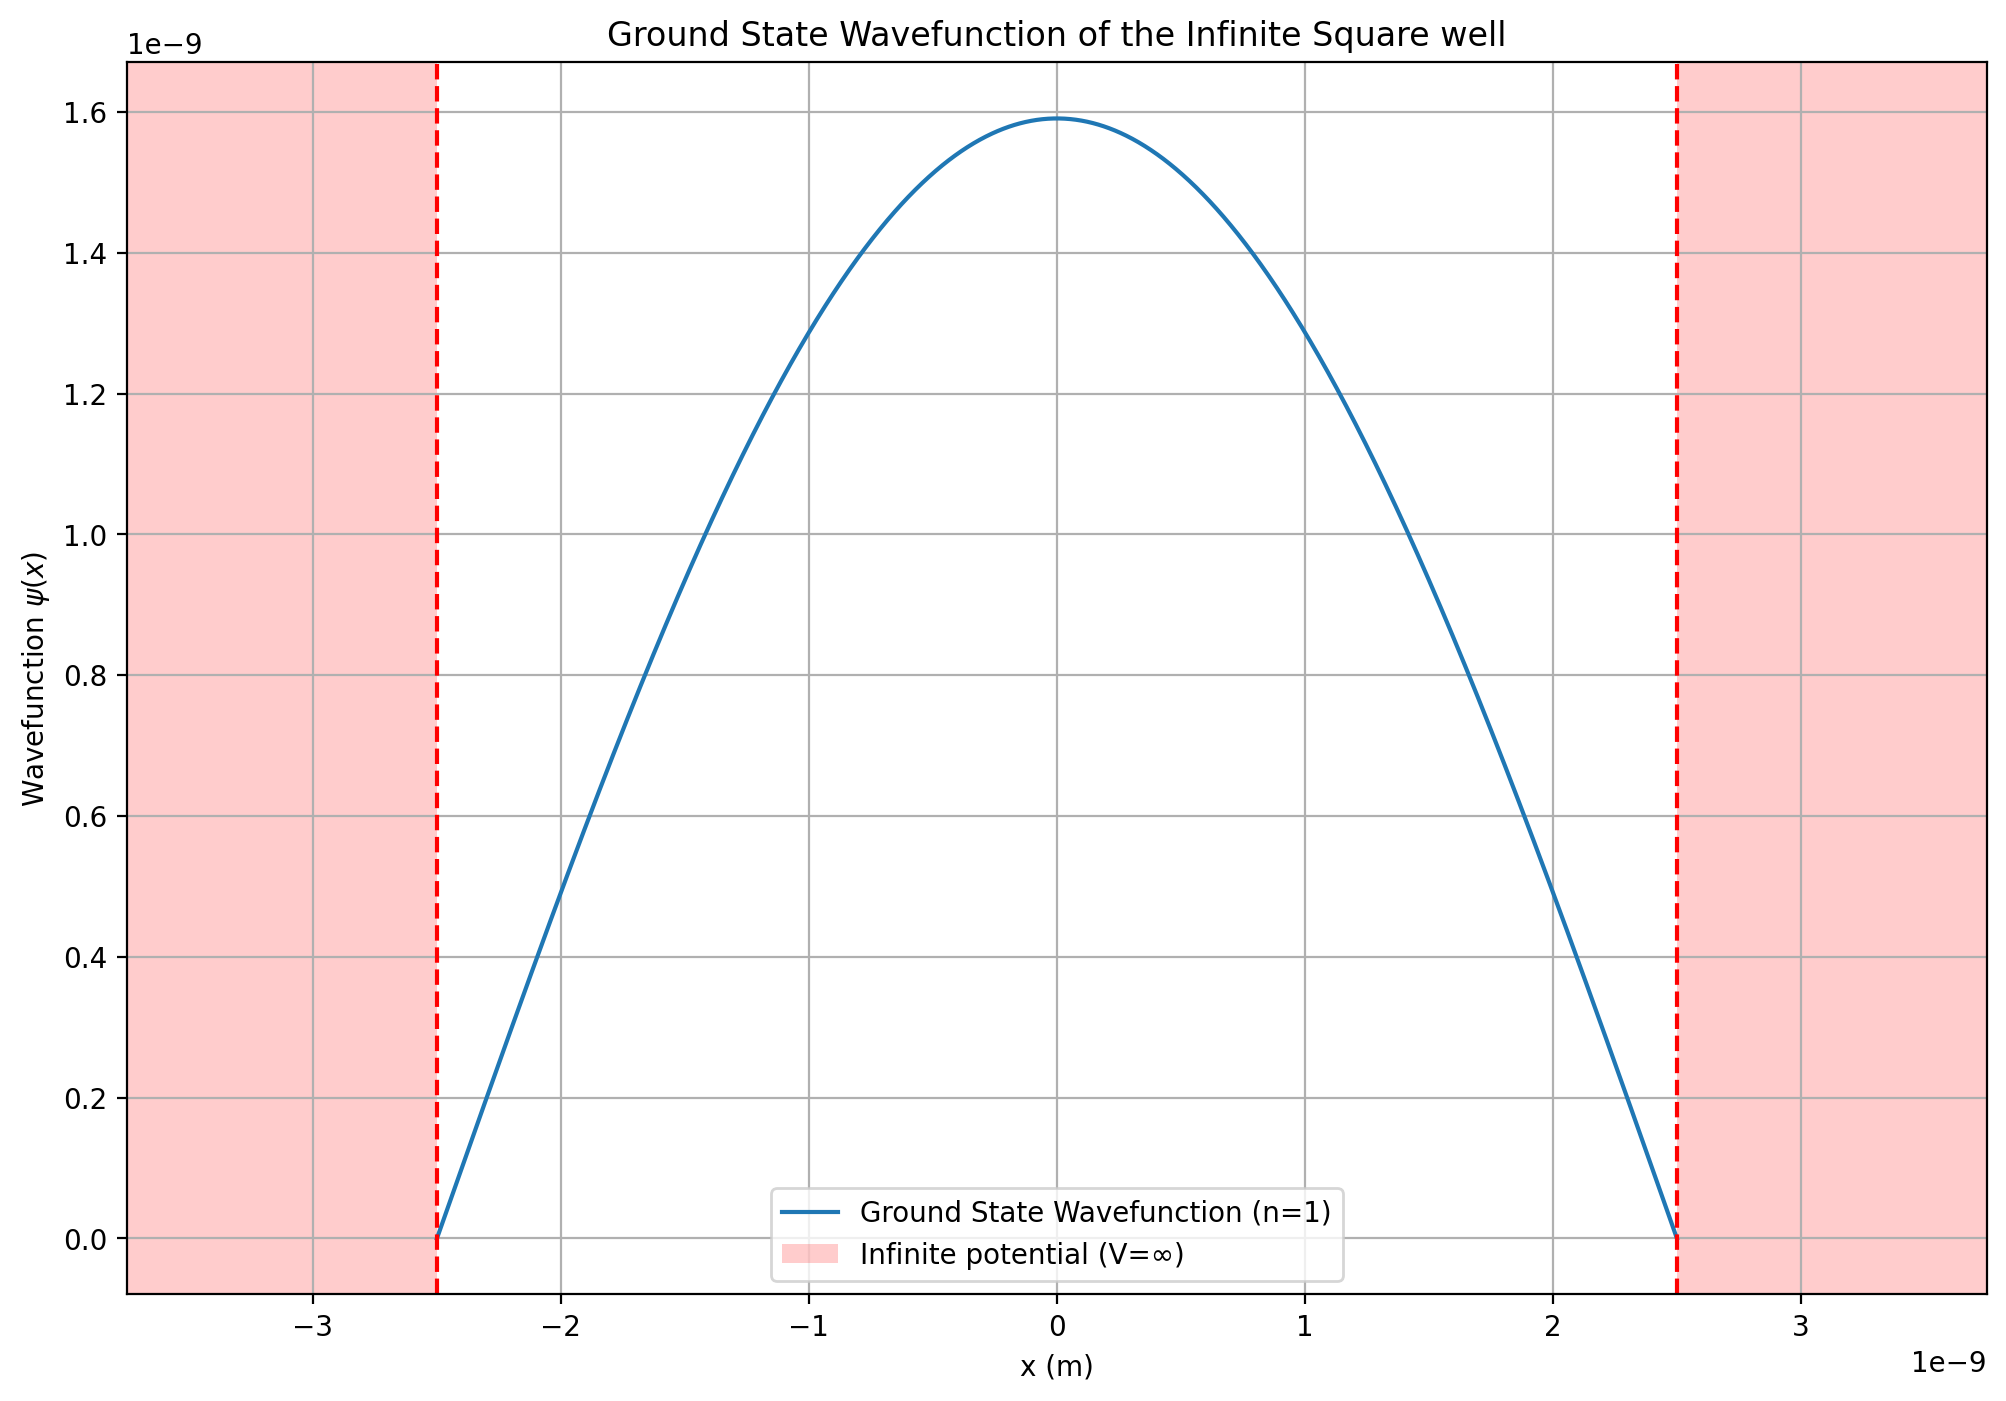

In [15]:
# Plot the ground state wavefunction 
plt.figure(figsize=(12,8))
plt.plot(x_points, psi, label = 'Ground State Wavefunction (n=1)')
plt.title('Ground State Wavefunction of the Infinite Square well')
plt.xlabel('x (m)')
plt.ylabel(r'Wavefunction $\psi(x)$')
plt.grid()

# Shade the infinite potential regions 
plt.axvspan(-1.5*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
plt.axvspan(a, 1.5*a, facecolor='red', alpha=0.2)
plt.axvline(-a,color = 'r', linestyle = '--', linewidth = '1.5')   # Lines displaying boundary conditions
plt.axvline(a,color  = 'r', linestyle = '--', linewidth = '1.5')

plt.xlim(-1.5*a, 1.5*a) # Extend the x-limit 

plt.legend(loc='best')

In [16]:
def norm_psi(func):  
    """
    Computes normalised wavefunctions using the Trapezoidal rule 
    
    Parameters
    ----------
    func(function): The wavefunction that has to be normalised
    
    Returns
    -------
    norm_psi(np.ndarray): Array of normalised wavefunctions at each discrete x position
    
    """
    N=2001
    
    # Compute the probability density, f(x) = |ψ(x)|^2
    f_x =  ( np.abs(func) ) ** 2

    # Trapezoidal rule
    I_1 = (0.5 * f_x[0] + 0.5 * f_x[-1])  # 1/2 f(a) + 1/2 f(b)
    I_2 = np.sum(f_x[1:-1])               # Sum f(x+kh) from 1 to N-1

    I = h*(I_1 + I_2)
    
    # Normalise the wavefunction
    norm_psi = psi / np.sqrt(I)

    return norm_psi

In [17]:
def known_psi(n):
    """
    Computes the existing analytical solutions for the normalised wavefunctions for an a infinite square well.
    
    
    Parameters
    ----------
    n(int): The quantum number
    
    Returns
    -------
    known_psi(np.ndarray): A Numpy array containing the known normalised wavefucntion values for each x value
    
    """
    
    # If n is an odd number
    if n % 2 ==1:
        
        known_psi = np.sqrt(2/d) * np.cos( (n * np.pi * x_points) / d)  # Normalised wavefunction when n is odd
        
    else:
        
        known_psi = np.sqrt(2/d) * np.sin( (n * np.pi * x_points) / d)  # Normalised wavefunction when n is even
    
    
    return np.array(known_psi)

In [18]:
# Print results alongside relative error
print(f'Normalised wavefunction : {norm_psi(psi)}')
print("---------------------------------------------------------")
print(f'Analytical solution : {known_psi(1)}')
print("---------------------------------------------------------")
print(f'Relative error: {error(norm_psi(psi),known_psi(1))}')

Normalised wavefunction : [0.00000000e+00 3.14394785e+01 6.28788793e+01 ... 6.28946311e+01
 3.14552304e+01 1.57519653e-02]
---------------------------------------------------------
Analytical solution : [1.22464680e-12 3.14316294e+01 6.28631812e+01 ... 6.28631812e+01
 3.14316294e+01 1.22464680e-12]
---------------------------------------------------------
Relative error: [1.00000000e+00 2.49717739e-04 2.49717739e-04 ... 5.00291878e-04
 7.50867254e-04 1.28624558e+10]


#### Comparison with analytical solutions

The results display extremely small relative error's for non-boundary values, suggesting an excellent match between the estimated wavefunction solutions and the analytical solutions. For most of the solutions, the relative error is approximately on the order of $10^{-8}$, indicating a high accuracy of the numerical technique.

However, this accuracy decreases at the boundaries, especially for $\psi(a)$, where a high relative error was observed. This discrepency may be due to the finite step size (N=2000) used; preventing the Secant method to converge to the exact point. Conversly, it could also be a normalisation error. 

Additionally, the analytical solution has perfect symmetry. Despite the calculated eigenfunctions exhibiting symmetry, it is not exact. This indicates the numerical methods used can introduce minor discrepancies.

### Task 3.3 : Finding the Higher Energy States

In [19]:
def setup_plot(title, xlabel):
    """
    Function that sets up the plot for visualising the normalised wavefunction solutions. It adds shaded regions 
    displaying the infinite potential beyond the boundary conditions.
    
    Parameters
    ----------
    title(str)    : Title of the plot
    xlabel(str)   : X-label of the plot
    potential(str): The potential within the infinite square well

    """
    # Labels for the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Normalised wavefunction ψ(x)')
    
    # Lines displaying boundary conditions
    plt.axvline(-a, color='red', linestyle='dotted', linewidth=1.5)
    plt.axvline(a, color='red', linestyle='dotted', linewidth=1.5)
   
    # shade regions of infinite potential
    plt.axvspan(-1.6*a, -a, facecolor='red', alpha=0.2, label='Infinite potential (V=∞)')
    plt.axvspan(a, 1.6*a, facecolor='red', alpha=0.2)
    
    plt.xlim(-1.6*a,1.6*a)
    
    plt.grid()
    plt.legend(loc='best')

In [22]:
def print_results(guess_func , analytic_func , potential , n0 , n1, norm_func):
    """
    Prints the estimated and existing solutions for both the eigenfunction and eigenvalues for a given nth quantum state.
    
    Parameters
    ----------
    guess_func(function)   : Function that creates energy guesses
    analytic_func(function): Function that generates the analytical solutions
    potential(function)    : Function that computes the potential energy in the quantum dot
    norm_func(function)    : Normalisation function
    n0(int)                : The lowest quantum state to study
    n1(int)                : The highest quantum state to study
   
    """
    
    for i in range(n0,n1):

        guess = guess_func(i, potential)

        eigenval = energy_guess(i , potential , guess , guess)
        
        print(f'For n = {i}:')
        print(f' . Estimated energy eigenvalue is: {eigenval / e } eV')
        print(f' . Known energy eigenvalue is:     {analytic_func(i,1) / e } eV')
        print(f' . Relative error (energies): {error(eigenval , analytic_func(i,1))}')

      

        psi = RK4(rhs_schrodinger , eigenval , potential)
        
        # Compute first 8 wavefunctions
        print(f'For n = {i}:')
        print(f' . Estimated wavefunction: {norm_psi(psi)[:8] } ')
        print(f' . Known wavefunction:     {norm_func(i)[:8]} ')

        print('--------------------------------------------------')

For n = 2:
 . Estimated energy eigenvalue is: 0.06022500538610594 eV
 . Known energy eigenvalue is:     0.06016482594164735 eV
 . Relative error (energies): 0.0010002429744740613
For n = 2:
 . Estimated wavefunction: [  0.          62.87895664 125.75775797 188.6362487  251.51427352
 314.39167714 377.26830425 440.14399955] 
 . Known wavefunction:     [-2.44929360e-12 -6.28631812e+01 -1.25725741e+02 -1.88587059e+02
 -2.51446514e+02 -3.14303485e+02 -3.77157351e+02 -4.40007490e+02] 
--------------------------------------------------


For n = 3:
 . Estimated energy eigenvalue is: 0.135506330827915 eV
 . Known energy eigenvalue is:     0.13537085836870655 eV
 . Relative error (energies): 0.001000750537013362
For n = 3:
 . Estimated wavefunction: [  0.          94.31847082 188.63670869 282.95448065 377.27155376
 471.58769505 565.90267158 660.2162504 ] 
 . Known wavefunction:     [-3.67394040e-12 -9.42945777e+01 -1.88587059e+02 -2.82875349e+02
 -3.77157351e+02 -4.71430969e+02 -5.65694107e+02 -6.59944671e+02] 
--------------------------------------------------


For n = 4:
 . Estimated energy eigenvalue is: 0.24090014369847593 eV
 . Known energy eigenvalue is:     0.2406593037665894 eV
 . Relative error (energies): 0.0010007505553166626
For n = 4:
 . Estimated wavefunction: [  0.         125.7579611  251.51561159 377.27264088 503.02873835
 628.7835934  754.53689544 880.28833388] 
 . Known wavefunction:     [4.89858720e-12 1.25725741e+02 2.51446514e+02 3.77157351e+02
 5.02853283e+02 6.28529343e+02 7.54180565e+02 8.79801984e+02] 
--------------------------------------------------


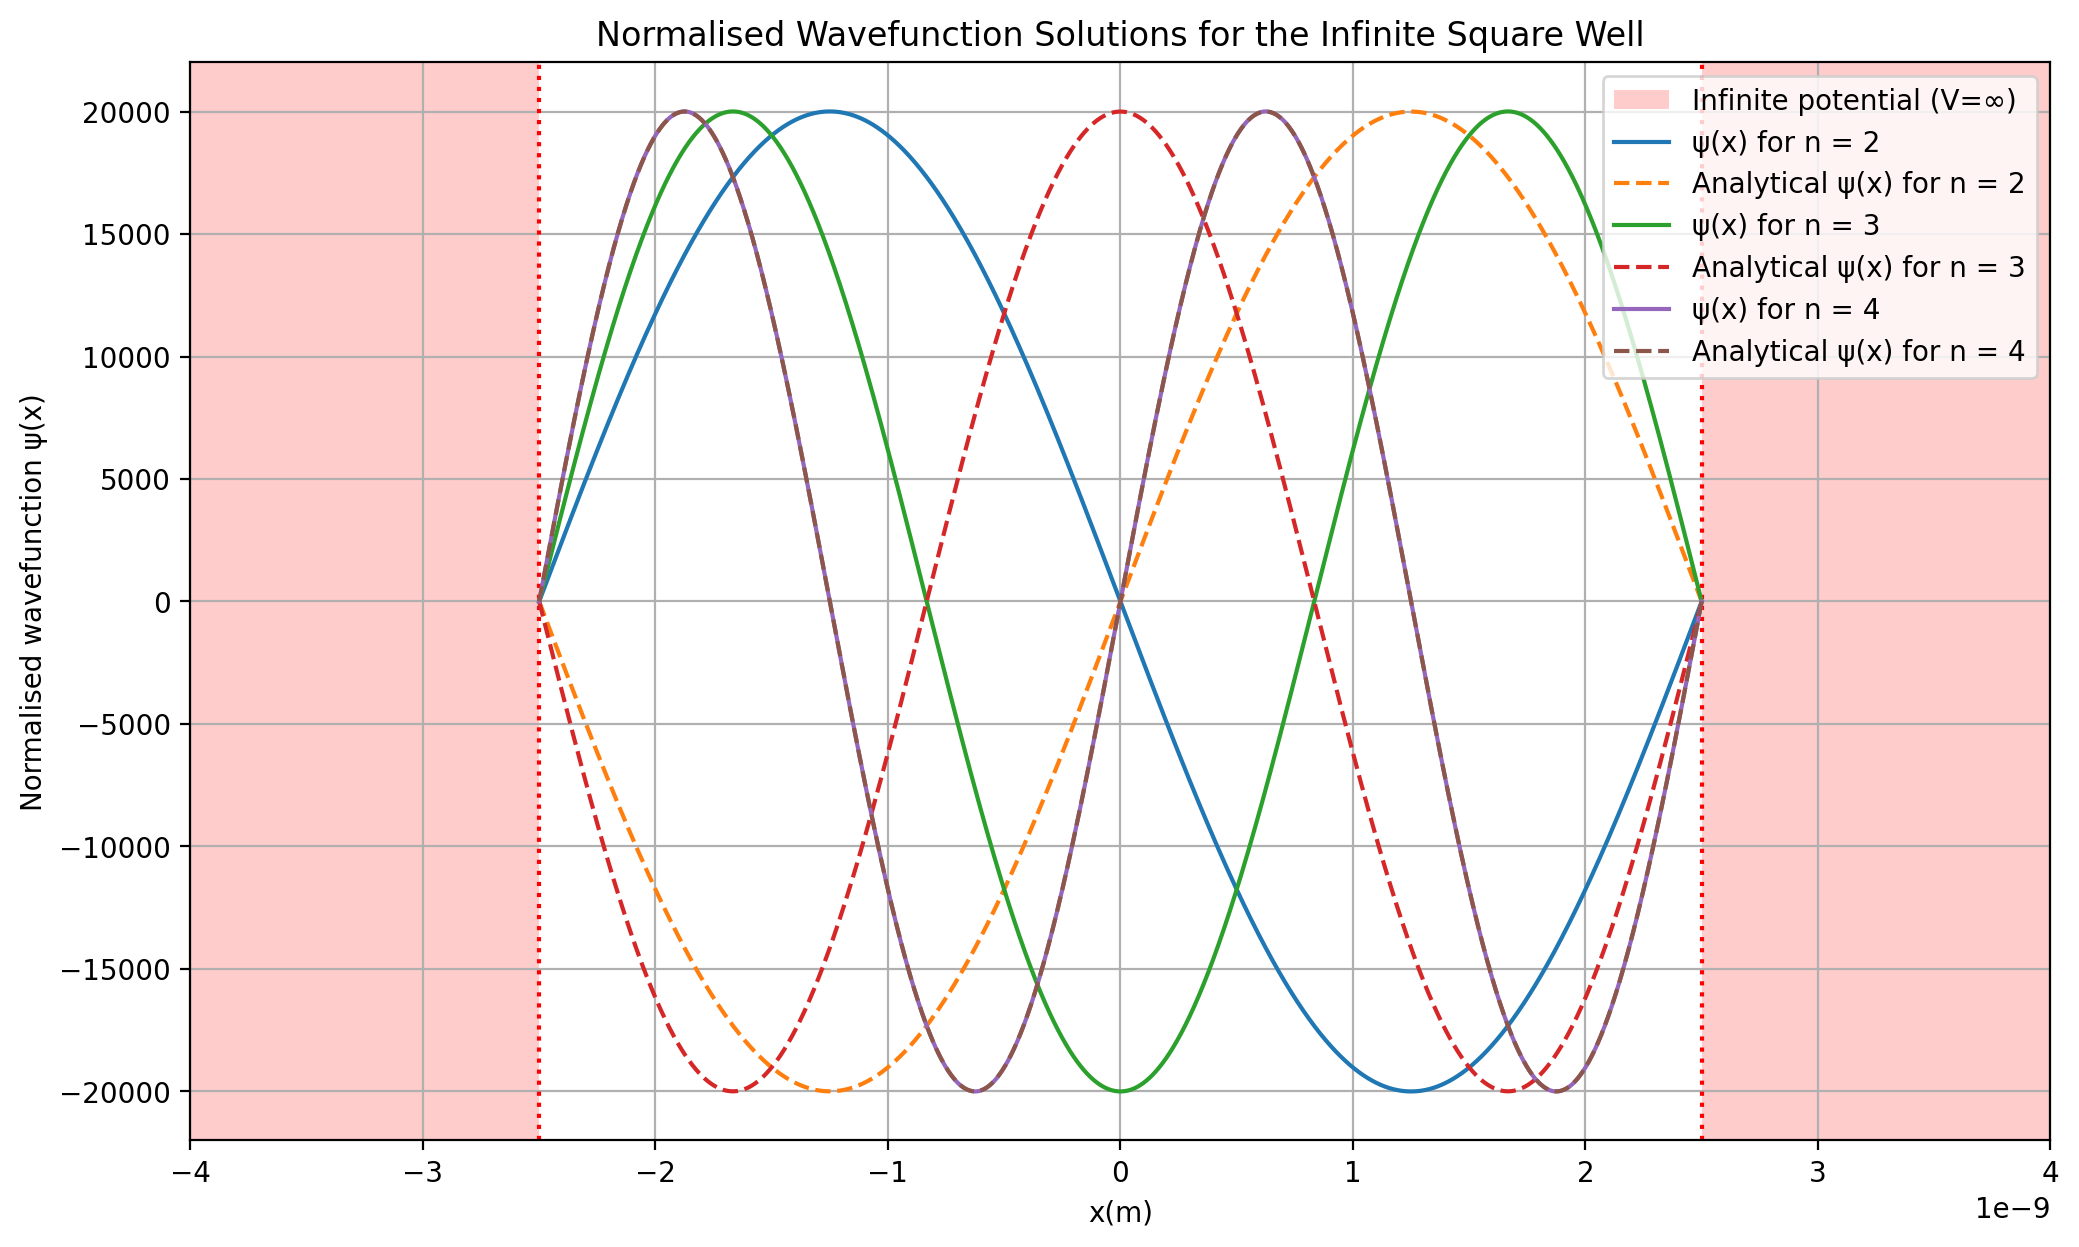

In [24]:
# Display the results and relative error
print_results(inf_sq_well, inf_sq_well , V , 2 , 5, known_psi)

# Set up the plot
setup_plot('Normalised Wavefunction Solutions for the Infinite Square Well', 'x(m)')   

# Plot the normalised wavefunctions (n = 2,3,4)
for i in range(2,5):   
    
    guess = inf_sq_well(i,1)

    eigenval = energy_guess(i , V , guess , guess)
    
    psi = RK4(rhs_schrodinger,eigenval, V)
    
    plt.plot(x_points, norm_psi(psi), label = f'ψ(x) for n = {i}')
    plt.plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}', linestyle = "--")
    
    plt.legend()

For the higher energy states, the estimated energies converged closely to the analytical results with relative errors of $10^{-7}$ and $10^{-11}$, quantifying the accuracy of the Secant method. It can be observed from the plot above that the number of nodes increases with $n$, and wavefunction solutions for $n=2,3$ exhibit phase offsets relative to their corresponding analytical solutions. Meanwhile for n=4, the numerical and analytical solution is in phase. These phase offsets are introduced as the RK4 solver outputs either $\psi(x)$ or  $-\psi(x)$, flipping the signs. This has no effect on the physical observations, and the eigenfunctions remain unchanged.

For n = 25:
 . Estimated energy eigenvalue is: 9.410162236317408 eV
 . Known energy eigenvalue is:     9.400754053382398 eV
 . Relative error (energies): 0.0010007902431639975
For n = 25:
 . Estimated wavefunction: [   0.          785.98243929 1571.93381829 2357.82307793 3143.6191616
 3929.29101637 4714.80759422 5500.13785327] 
 . Known wavefunction:     [-4.91096681e-12  7.85588908e+02  1.56996528e+03  2.35191846e+03
  3.13024152e+03  3.90373315e+03  4.67119948e+03  5.43145596e+03] 
--------------------------------------------------


For n = 26:
 . Estimated energy eigenvalue is: 10.178031543370325 eV
 . Known energy eigenvalue is:     10.167855584138401 eV
 . Relative error (energies): 0.0010007969869082693
For n = 26:
 . Estimated wavefunction: [   0.          817.42174515 1634.8111876  2452.13602591 3269.36396122
 4086.46269846 4903.39994771 5720.14342541] 
 . Known wavefunction:     [ 3.92134568e-11 -8.16995310e+02 -1.63262673e+03 -2.44553264e+03
 -3.25435598e+03 -4.05774649e+03 -4.85436301e+03 -5.64287565e+03] 
--------------------------------------------------


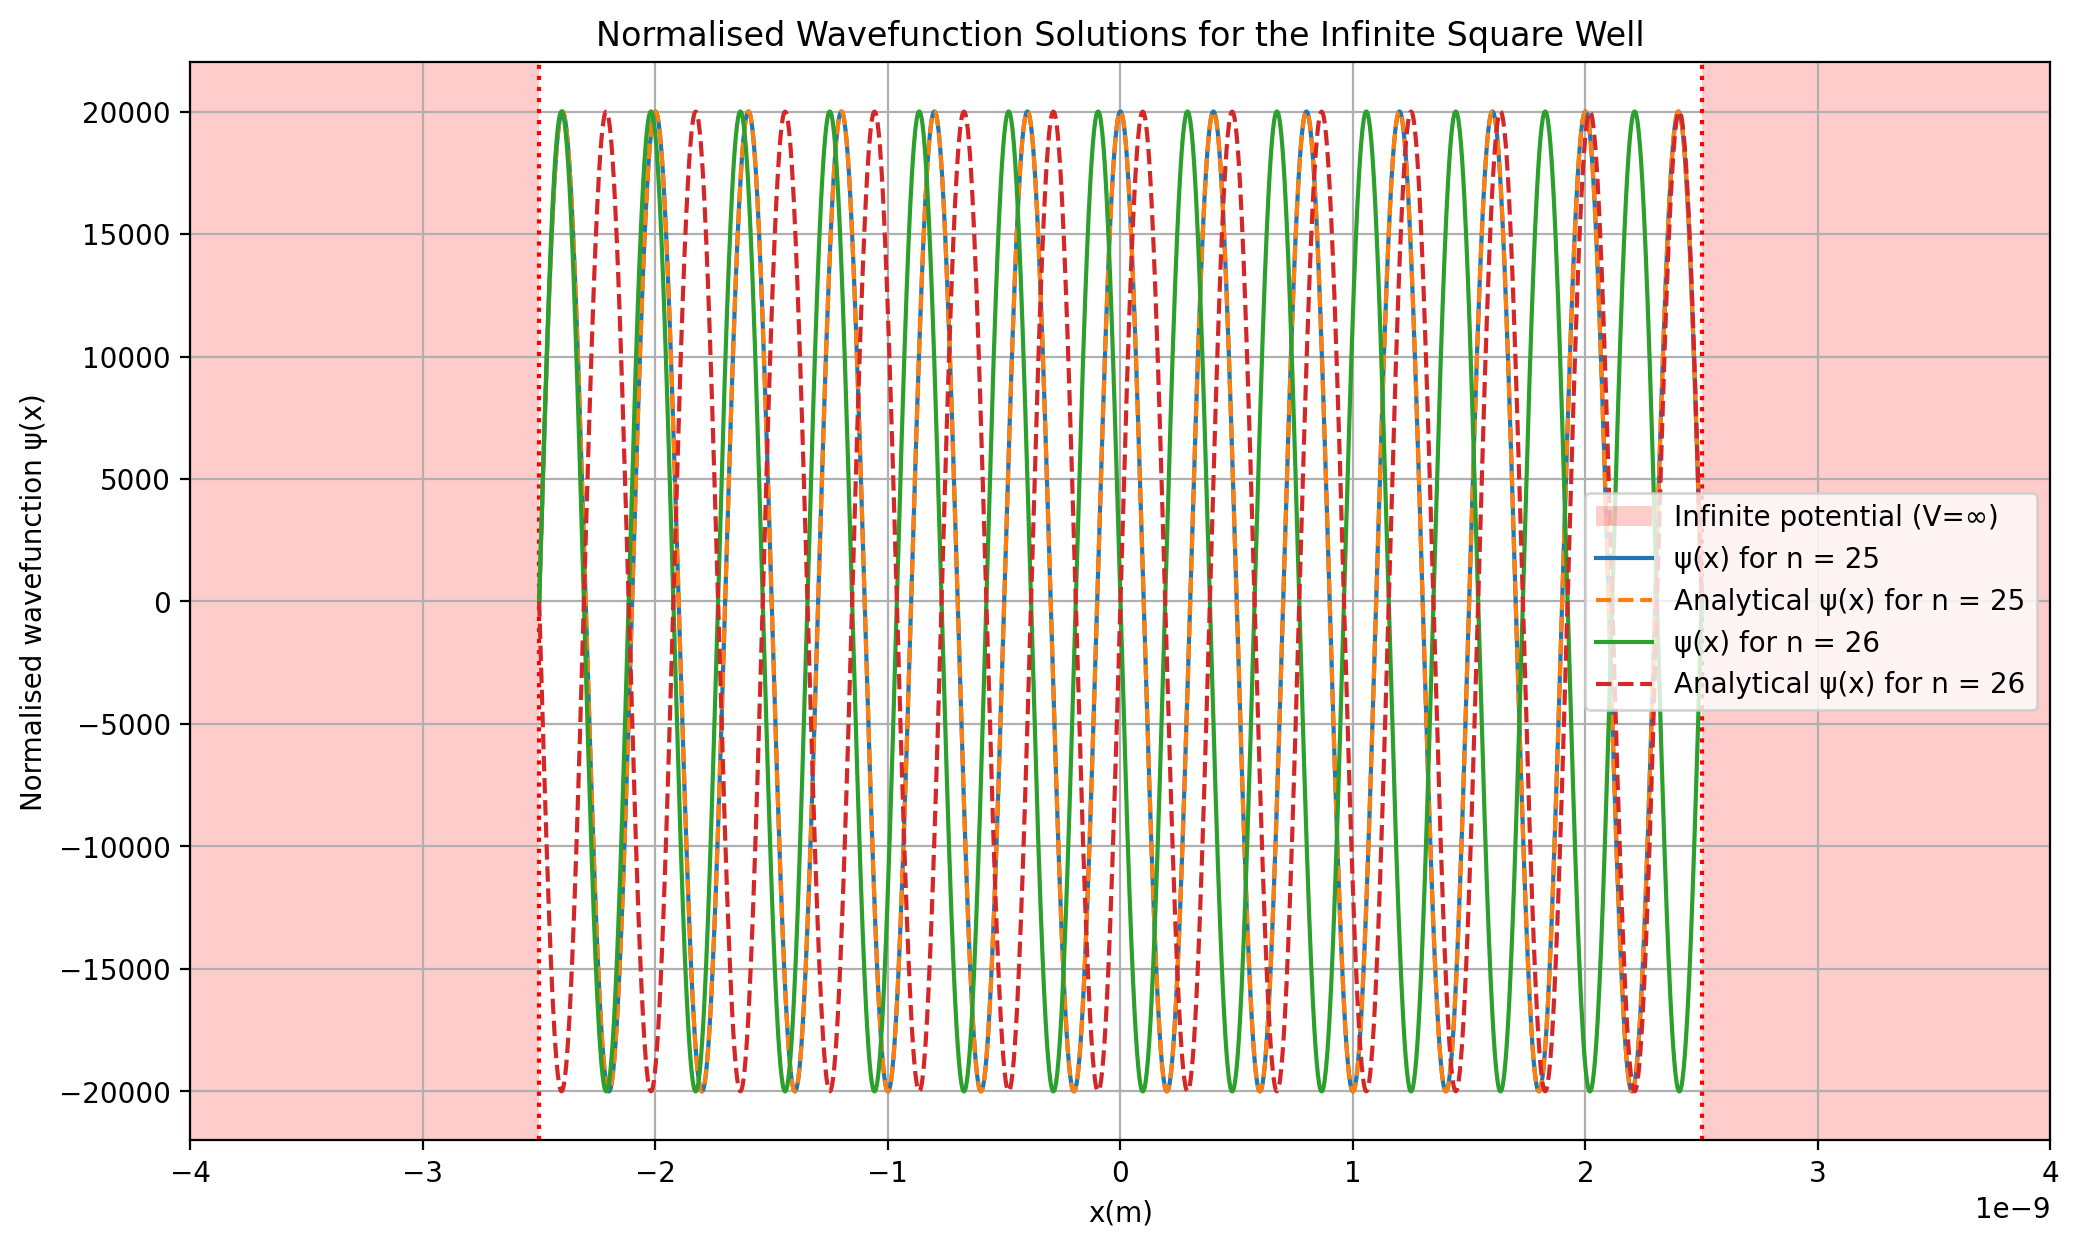

In [26]:
print_results(inf_sq_well, inf_sq_well, V , 25 , 27, known_psi)
setup_plot('Normalised Wavefunction Solutions for the Infinite Square Well', 'x(m)')   

# Plot the normalised wavefunction (n = 25,26)
for i in range(25,27):   
    
    guess = inf_sq_well(i,1)

    eigenval = energy_guess(i , V , guess , guess)
    
    psi = RK4(rhs_schrodinger,eigenval, V)
    
    plt.plot(x_points, norm_psi(psi), label = f'ψ(x) for n = {i}')
    plt.plot(x_points, known_psi(i), label = f'Analytical ψ(x) for n = {i}', linestyle = "--")
    
    plt.legend()

Similarly to lower excited states, the estimated eigenvalue converged to the analytical solution with a relative error of approximately $10^{-8}$. The numerically obtained eigenfunctions also converges well to its analytical solution. Therefore, matrix discretisation is compatible for finding eigenstates for large $n$ states ($n \geq 25$).

### Task 4: The Infinite "Unsquare" Well

#### I. Harmonic Potential

In [27]:
def harmonic(x):
    """
    Computes the harmonic potential for a given x position.
    
    Parameters
    ----------
    x (np.ndarray): Position of the electron on the x-axis
    
    Returns
    -------
    np.ndarray    : The harmonic potential at each spatial coordinate
    
    Notes
    -----
    v0, the characteristic potential is a global variable with an initial value of 700e (eV)
    
    """
    
    
    return (v0 * x**2) / a**2    # Harmonic potential

In [28]:
def h_psi(n):
    
    """
    Computes the analytical solutions for a quantum harmonic oscillator using hermite polynomials.
    
    Parameters
    ----------
    n(int): Quantum state number
    
    Returns
    -------
    solution(np.ndarray): Normalised analytical solutions for the quantum harmonic oscillator
    
    """
    # Angular frequency for quantum harmonic oscillator
    w = np.sqrt((2*v0) / (a**2 * m))
    
    # Find the scaling factor, for x to be dimensionless
    alpha = np.sqrt( (m * w) / h_bar )
    
    # Scaled x values
    x = x_points * alpha
    
    # Calculate normalisation factor
    norm_factor = np.sqrt(1 / (2**n * math.factorial(n))) * (alpha / np.pi)**(1/4)
    
    # Compute hermite polynomial for scaled x values
    H = sp.hermite(n)(x)
    
    # Normalised wavefunction
    solution = norm_factor * H * np.exp(-0.5 * x**2) 
    
    return solution

In [30]:
def harmonic_energy(n,v):
    """
    Computes the analytical energy solution for a quantum harmonic oscillator given the quantum state number, n.
    
    Parameters
    ----------
    n(int)  : Quantum state number
    
    Returns
    -------
    float: The analytical energy solution for he quantum harmonic oscillator
    
    Notes
    -----
    The ground state energy for the harmonic oscillator is defined at n=0
   
    """     
    # Angular frequency for quantum harmonic oscillator
    w = np.sqrt((2*v0) / (a**2 * m))
    
    E = (n + 0.5) * h_bar * w 
    
    return E # nth energy level

In [32]:
# Print results for the estimated and analytical eigenstates (n = 0,1,2)
print_results(harmonic_energy, harmonic_energy , harmonic , 0 , 3, h_psi)

For n = 0:
 . Estimated energy eigenvalue is: 2.066748740751137 eV
 . Known energy eigenvalue is:     2.0657153638945656 eV
 . Relative error (energies): 0.0005002513292165464
For n = 0:
 . Estimated wavefunction: [0.00000000e+000 8.98844244e-129 1.79618796e-128 2.69053311e-128
 3.58038669e-128 4.46426318e-128 5.34068702e-128 6.20819511e-128] 
 . Known wavefunction:     [5.73770042e-72 8.05202878e-72 1.12960200e-71 1.58415719e-71
 2.22087328e-71 3.11244703e-71 4.36046539e-71 6.10683808e-71] 
--------------------------------------------------


For n = 1:
 . Estimated energy eigenvalue is: 6.200246255087224 eV
 . Known energy eigenvalue is:     6.197146091683697 eV
 . Relative error (energies): 0.000500256627431735
For n = 1:
 . Estimated wavefunction: [0.00000000e+000 2.53803950e-129 5.07184199e-129 7.59717755e-129
 1.01098304e-128 1.26056059e-128 1.50803375e-128 1.75298941e-128] 
 . Known wavefunction:     [-1.49371123e-70 -2.09410940e-70 -2.93483937e-70 -4.11170128e-70
 -5.75852189e-70 -8.06218455e-70 -1.12835744e-69 -1.57867561e-69] 
--------------------------------------------------


For n = 2:
 . Estimated energy eigenvalue is: 10.333743852067995 eV
 . Known energy eigenvalue is:     10.328576819472827 eV
 . Relative error (energies): 0.0005002656886305863
For n = 2:
 . Estimated wavefunction: [0.00000000e+000 4.64058253e-124 9.27341808e-124 1.38907726e-123
 1.84849378e-123 2.30482443e-123 2.75730740e-123 3.20518733e-123] 
 . Known wavefunction:     [2.74561190e-69 3.84534980e-69 5.38374359e-69 7.53502489e-69
 1.05423352e-68 1.47448635e-68 2.06156244e-68 2.88140319e-68] 
--------------------------------------------------


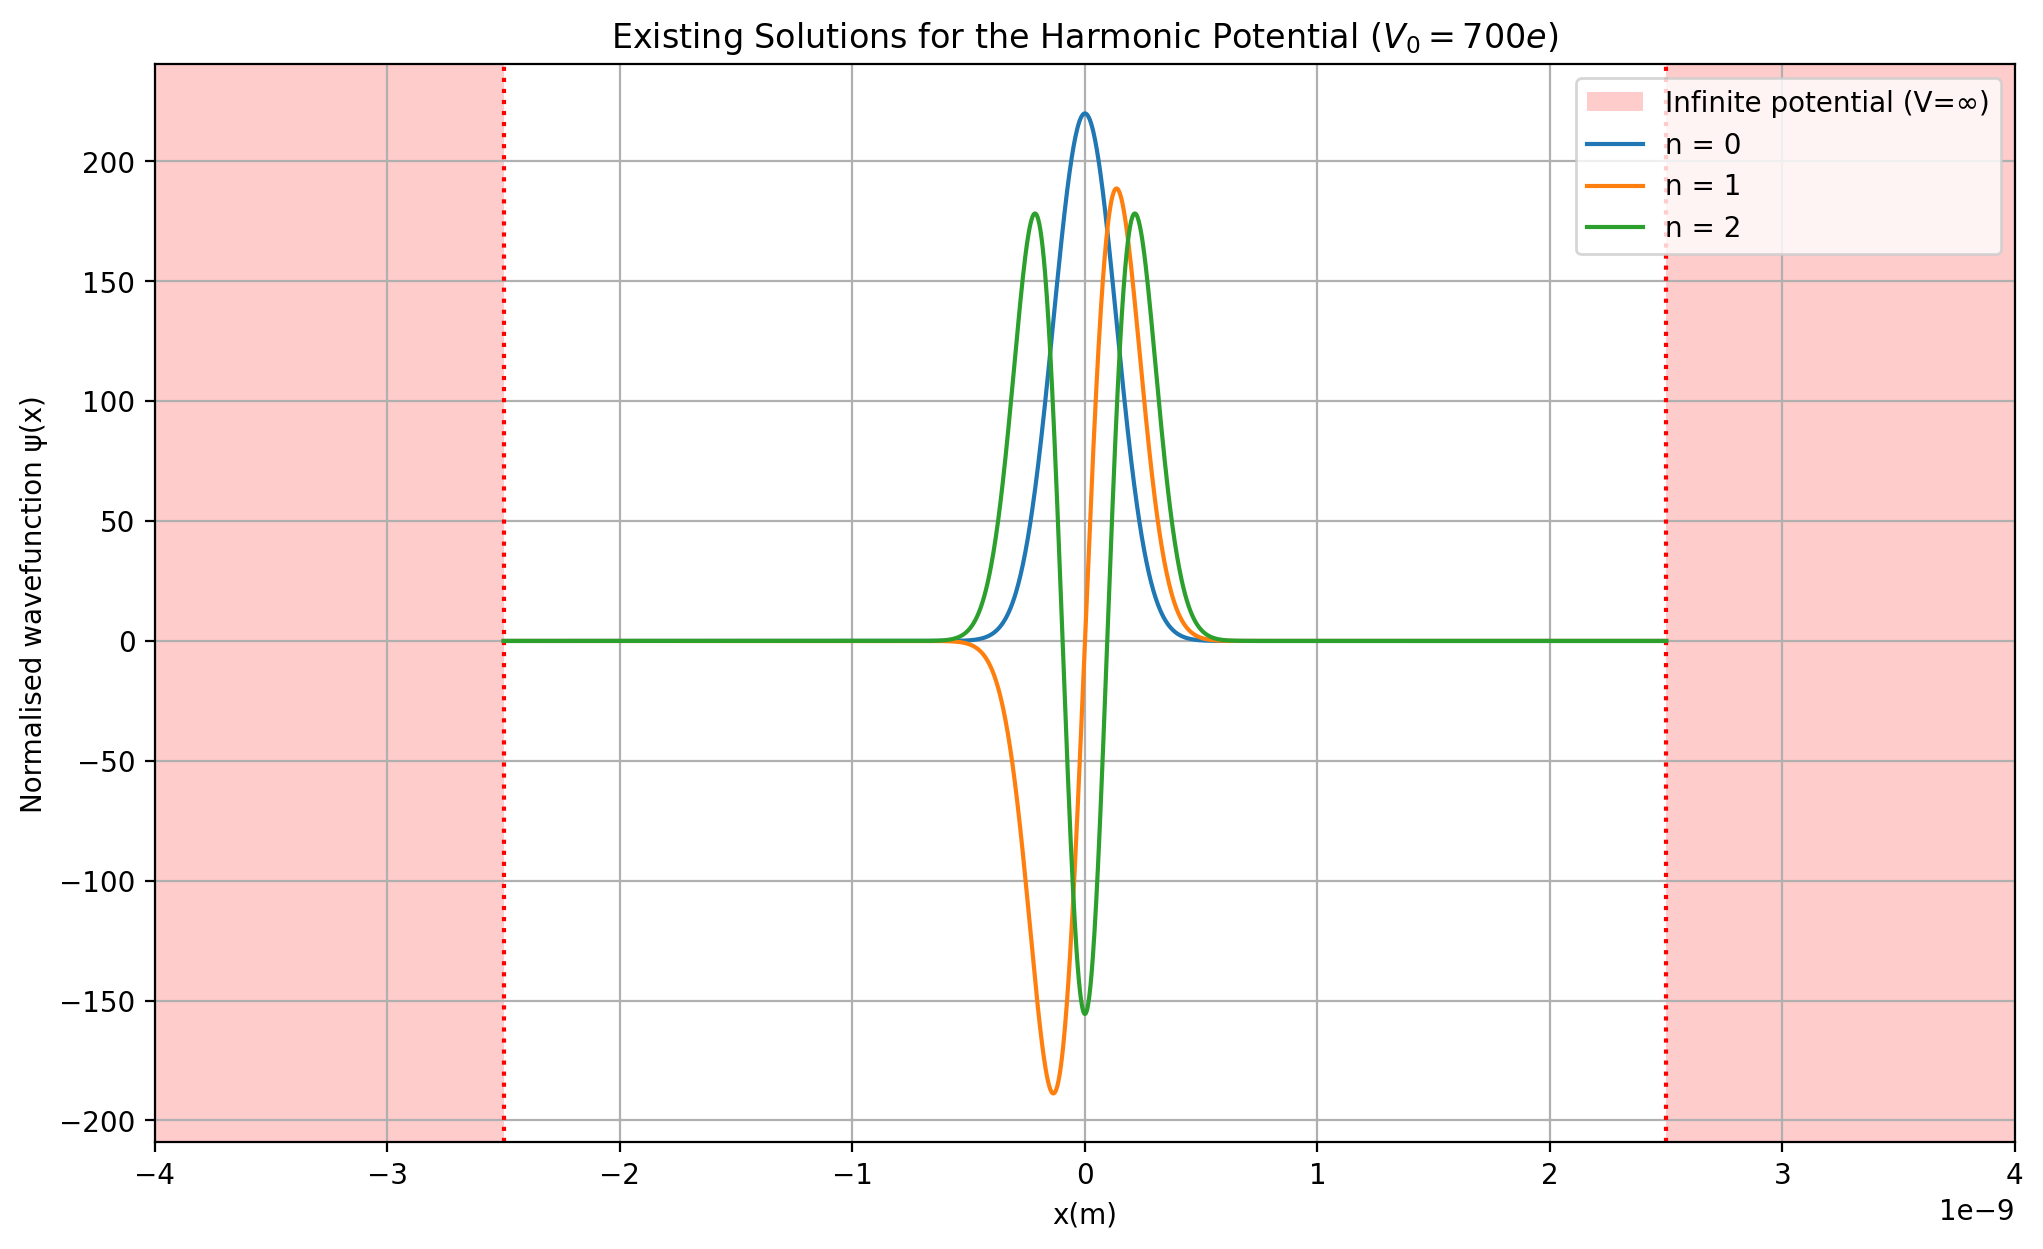

In [33]:
setup_plot(r'Existing Solutions for the Harmonic Potential ($V_0 = 700e$)', 'x(m)')   

# Plot the analytical solutions (n=0,1,2)
for i in range(0, 3):
   
    plt.plot(x_points, h_psi(i), label=f'n = {i}')
    plt.legend(loc='best')

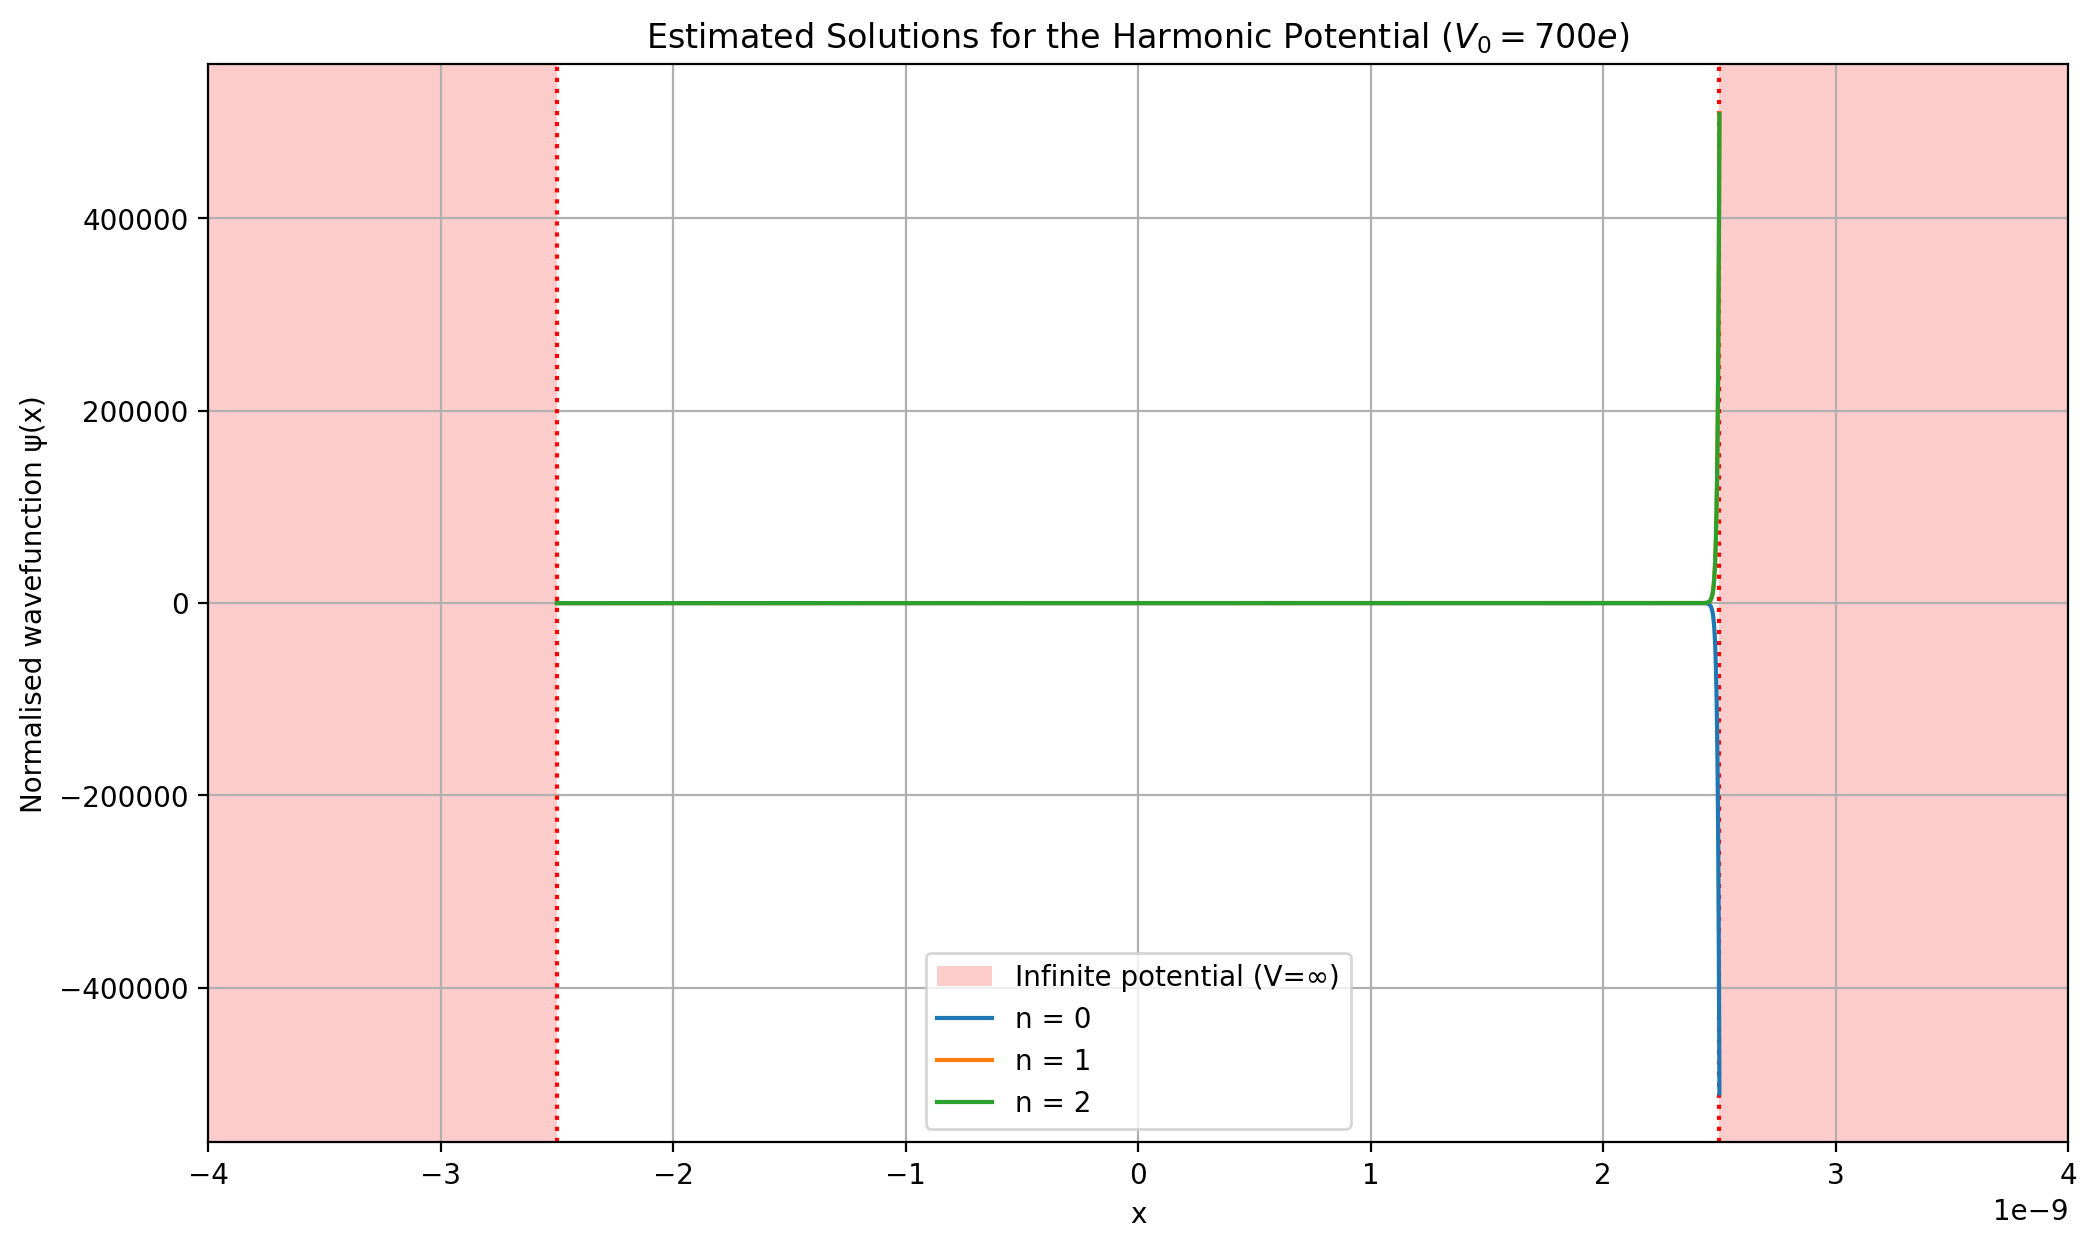

In [35]:
setup_plot(r'Estimated Solutions for the Harmonic Potential ($V_0 = 700e$)', 'x') 

# Plot the estimated solutions (n=0,1,2)
for i in range(0, 3):
    
    # Initial energy guess
    guess = harmonic_energy(i,1)
    
    # Compute eigenstates
    eigenval = energy_guess(i, harmonic, guess, guess)
    psi = RK4(rhs_schrodinger, eigenval, harmonic)
    
    plt.plot(x_points, norm_psi(psi), label= f'n = {i}')
    plt.legend()

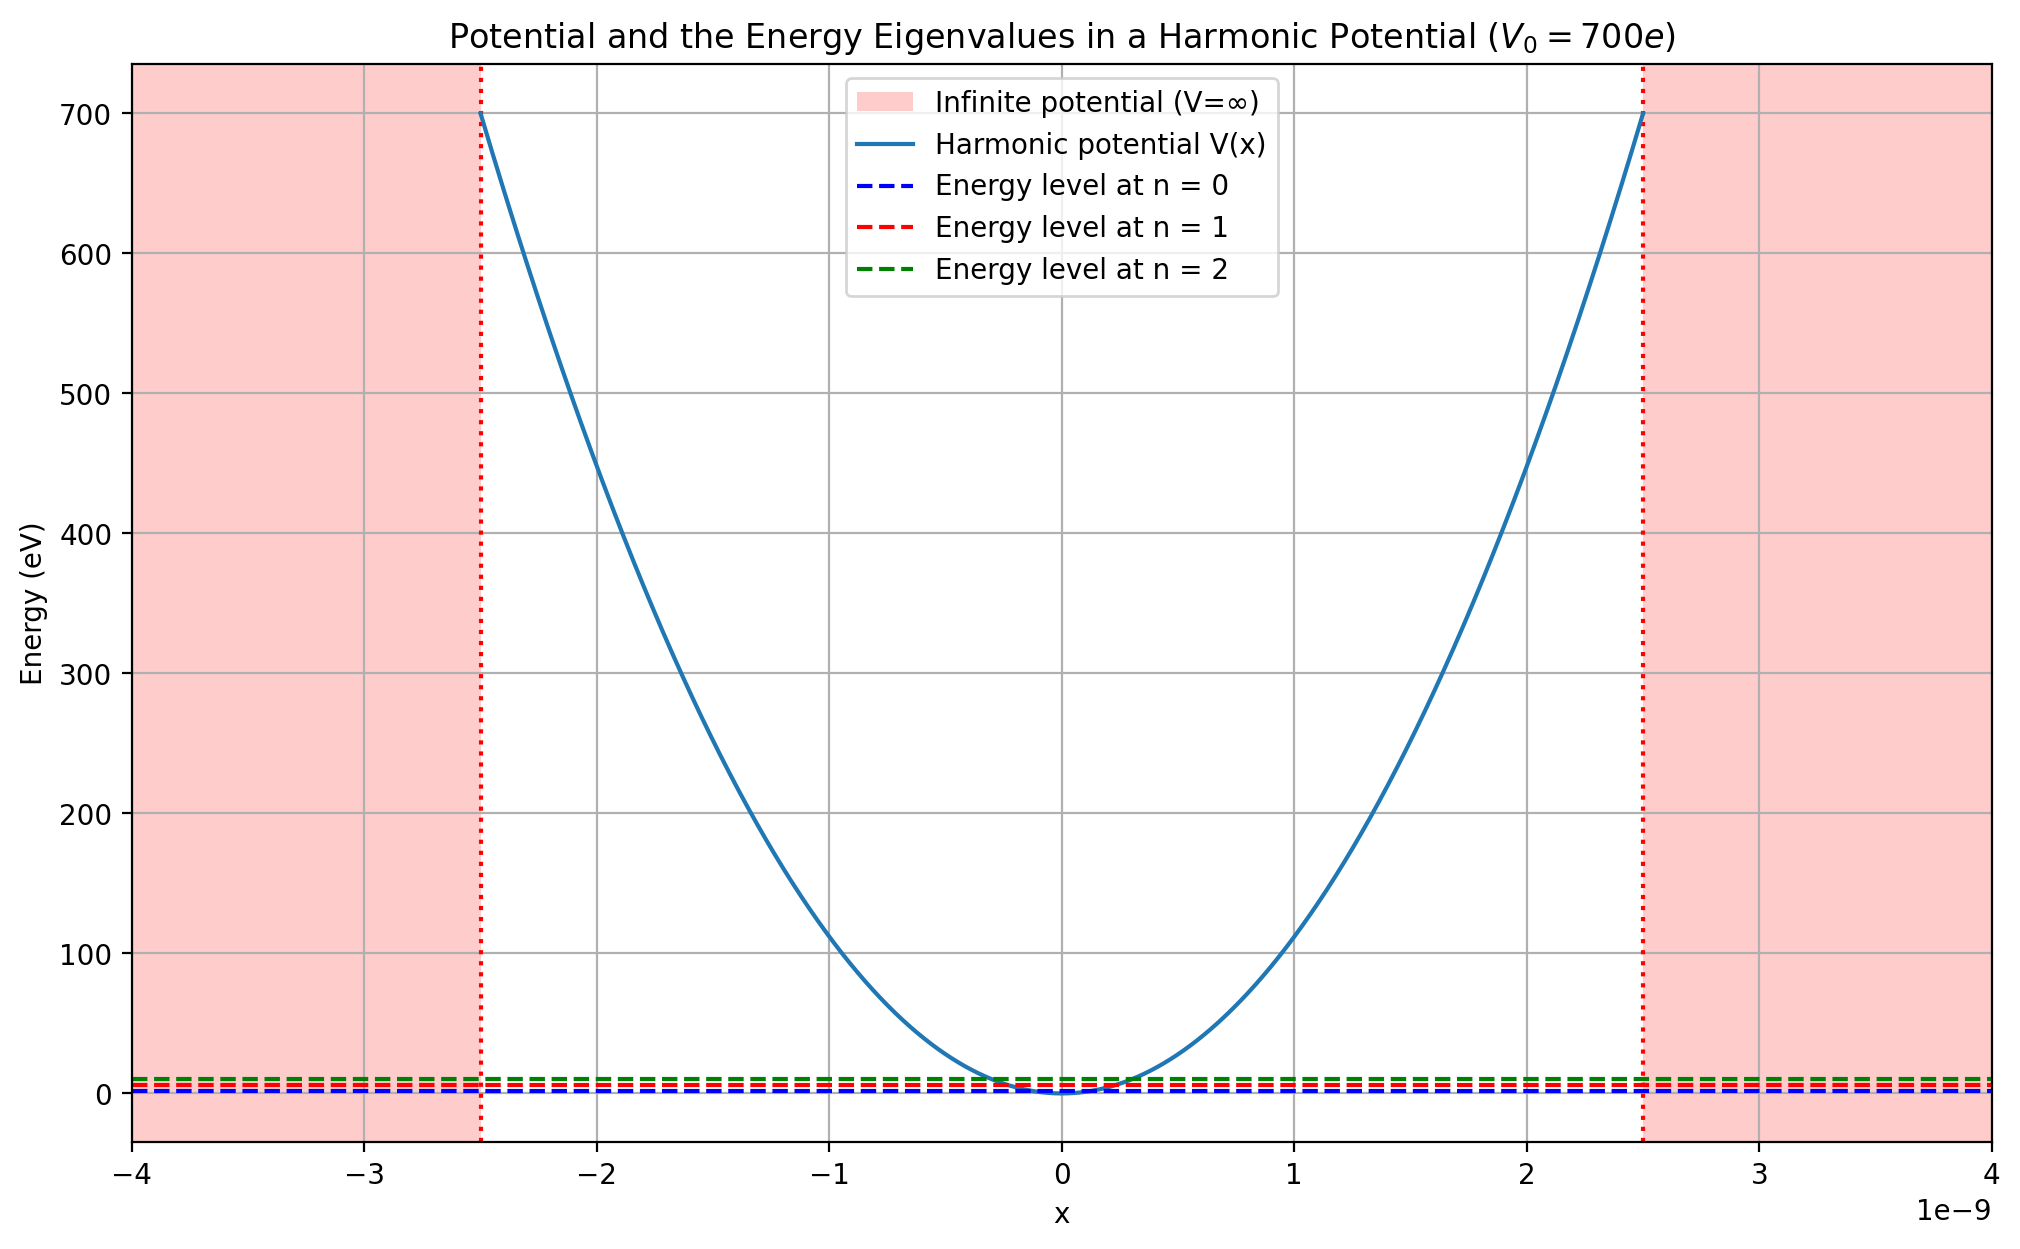

In [36]:
setup_plot(r'Potential and the Energy Eigenvalues in a Harmonic Potential ($V_0 = 700e$)', 'x')

# Plot the potential curve in eV's
plt.plot(x_points, harmonic(x_points) / e, label='Harmonic potential V(x)')

# Plot the energy eigenvalues (n=0,1,2)
for i in range(0, 3):
    
    # Array of colours to visualise the energy eigenvalues
    colors = ['red', 'green', 'blue']   
    
    # Compute eigenvalues
    guess = harmonic_energy(i,1)
    eigenval = energy_guess(i, harmonic, guess, guess)
    
    # Overlay energy eigenvalues as horizontal lines
    plt.axhline(y = eigenval / e, linestyle='--', color=colors[i-1], label=f'Energy level at n = {i}')
    
    plt.ylabel('Energy (eV)')
    plt.legend()
   

#### Analysis of the Results

The numerical solutions for the eigenvalues converge closely with its analytical predictions - for quantum states ,$n=0,1$ the relative errors were on orders of $10^{-9}$ and for $n=2$, it increased to $10^{-8}$ . However, the normalised wavefunctions exhibit significant discrepancies in comparison to their analytical counterparts.

The analytical ground state solution exhibits a gaussian-like curve with increasing nodes for a higher $n$ value, the numerical solutions decay immediately to values between $10^{-129}$ and $10^{-124}$, and changes rapidly at the boundary, $x = -a$. This behaviour is unphysical, because the high harmonic potential embedded within the well ($V_0 = 700e$) produces a steep gradient that causes the wavefunction to rapidly decay. The normalised wavefunction deviates by a factor of approximately $10^{60}$ from the analytical solutions and this may highlight an error in normalisation. 

Additionally, from the plot of the harmonic potential further reinforces this unphysical behaviour, the computed energy levels are insignificant compared to the harmonic potential curve. This means that the electron is deeply confined within the potential well, which prevents them to exhibit oscillations. Decreasing the characteristic potential to a lower value, such as $V_0 \approx e$, may result in more physical observations.


In [37]:
# v0 adjusted to e
v0 = e

# Plot results adjusted to v0=e
print_results(harmonic_energy, harmonic_energy , harmonic , 0 , 3, h_psi)

For n = 0:
 . Estimated energy eigenvalue is: 0.07811742384651346 eV
 . Known energy eigenvalue is:     0.07807670189014734 eV
 . Relative error (energies): 0.0005215634802736458
For n = 0:
 . Estimated wavefunction: [ 0.          1.17865905  2.49160011  4.08784175  6.14793581  8.90421618
 12.66673147 17.85772623] 
 . Known wavefunction:     [0.2418011  0.24491799 0.24807187 0.25126315 0.25449221 0.25775947
 0.26106533 0.2644102 ] 
--------------------------------------------------


For n = 1:
 . Estimated energy eigenvalue is: 0.23438599419661318 eV
 . Known energy eigenvalue is:     0.23423010567044208 eV
 . Relative error (energies): 0.000665535823095388
For n = 1:
 . Estimated wavefunction: [ 0.          5.41888247 11.45512621 18.7938438  28.26512189 40.93711506
 58.23527109 82.10085852] 
 . Known wavefunction:     [-1.22380591 -1.23834092 -1.25303124 -1.2678783  -1.28288354 -1.29804841
 -1.31337438 -1.32886292] 
--------------------------------------------------


For n = 2:
 . Estimated energy eigenvalue is: 0.3909852711461581 eV
 . Known energy eigenvalue is:     0.3903835094507367 eV
 . Relative error (energies): 0.001541462897006324
For n = 2:
 . Estimated wavefunction: [  0.          16.54621718  34.9775082   57.38582127  86.30577385
 124.99890885 177.8177415  250.68981329] 
 . Known wavefunction:     [4.20879597 4.2541761  4.29998069 4.3462129  4.3928759  4.43997288
 4.48750705 4.53548161] 
--------------------------------------------------


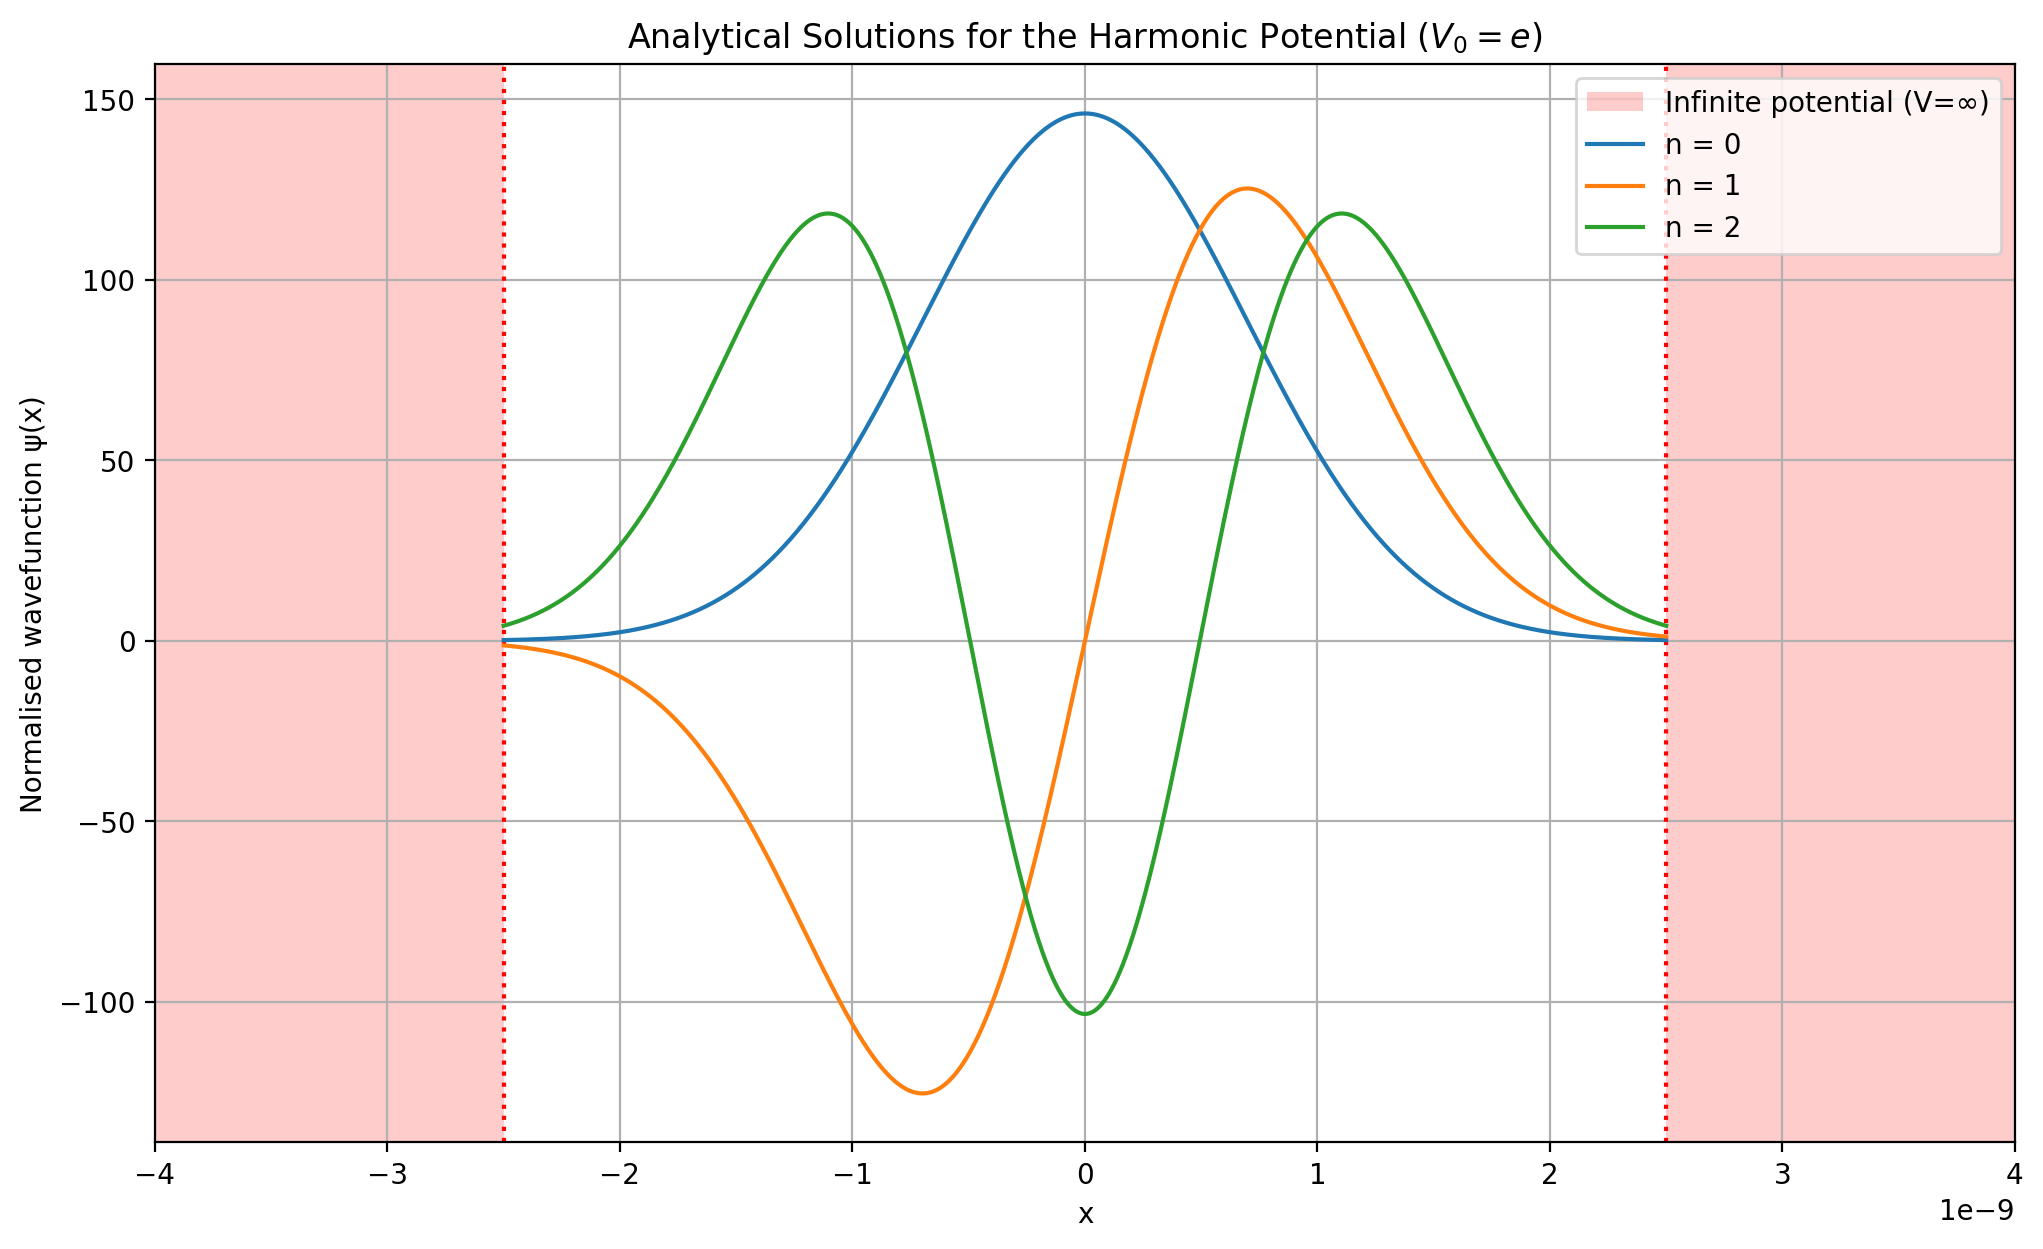

In [38]:
setup_plot(r'Analytical Solutions for the Harmonic Potential ($V_0 = e$)', 'x') 

# Plot the analytical solutions (n=0,1,2)
for i in range(0, 3):
   
    plt.plot(x_points, h_psi(i), label=f'n = {i}')
    plt.legend(loc='best')

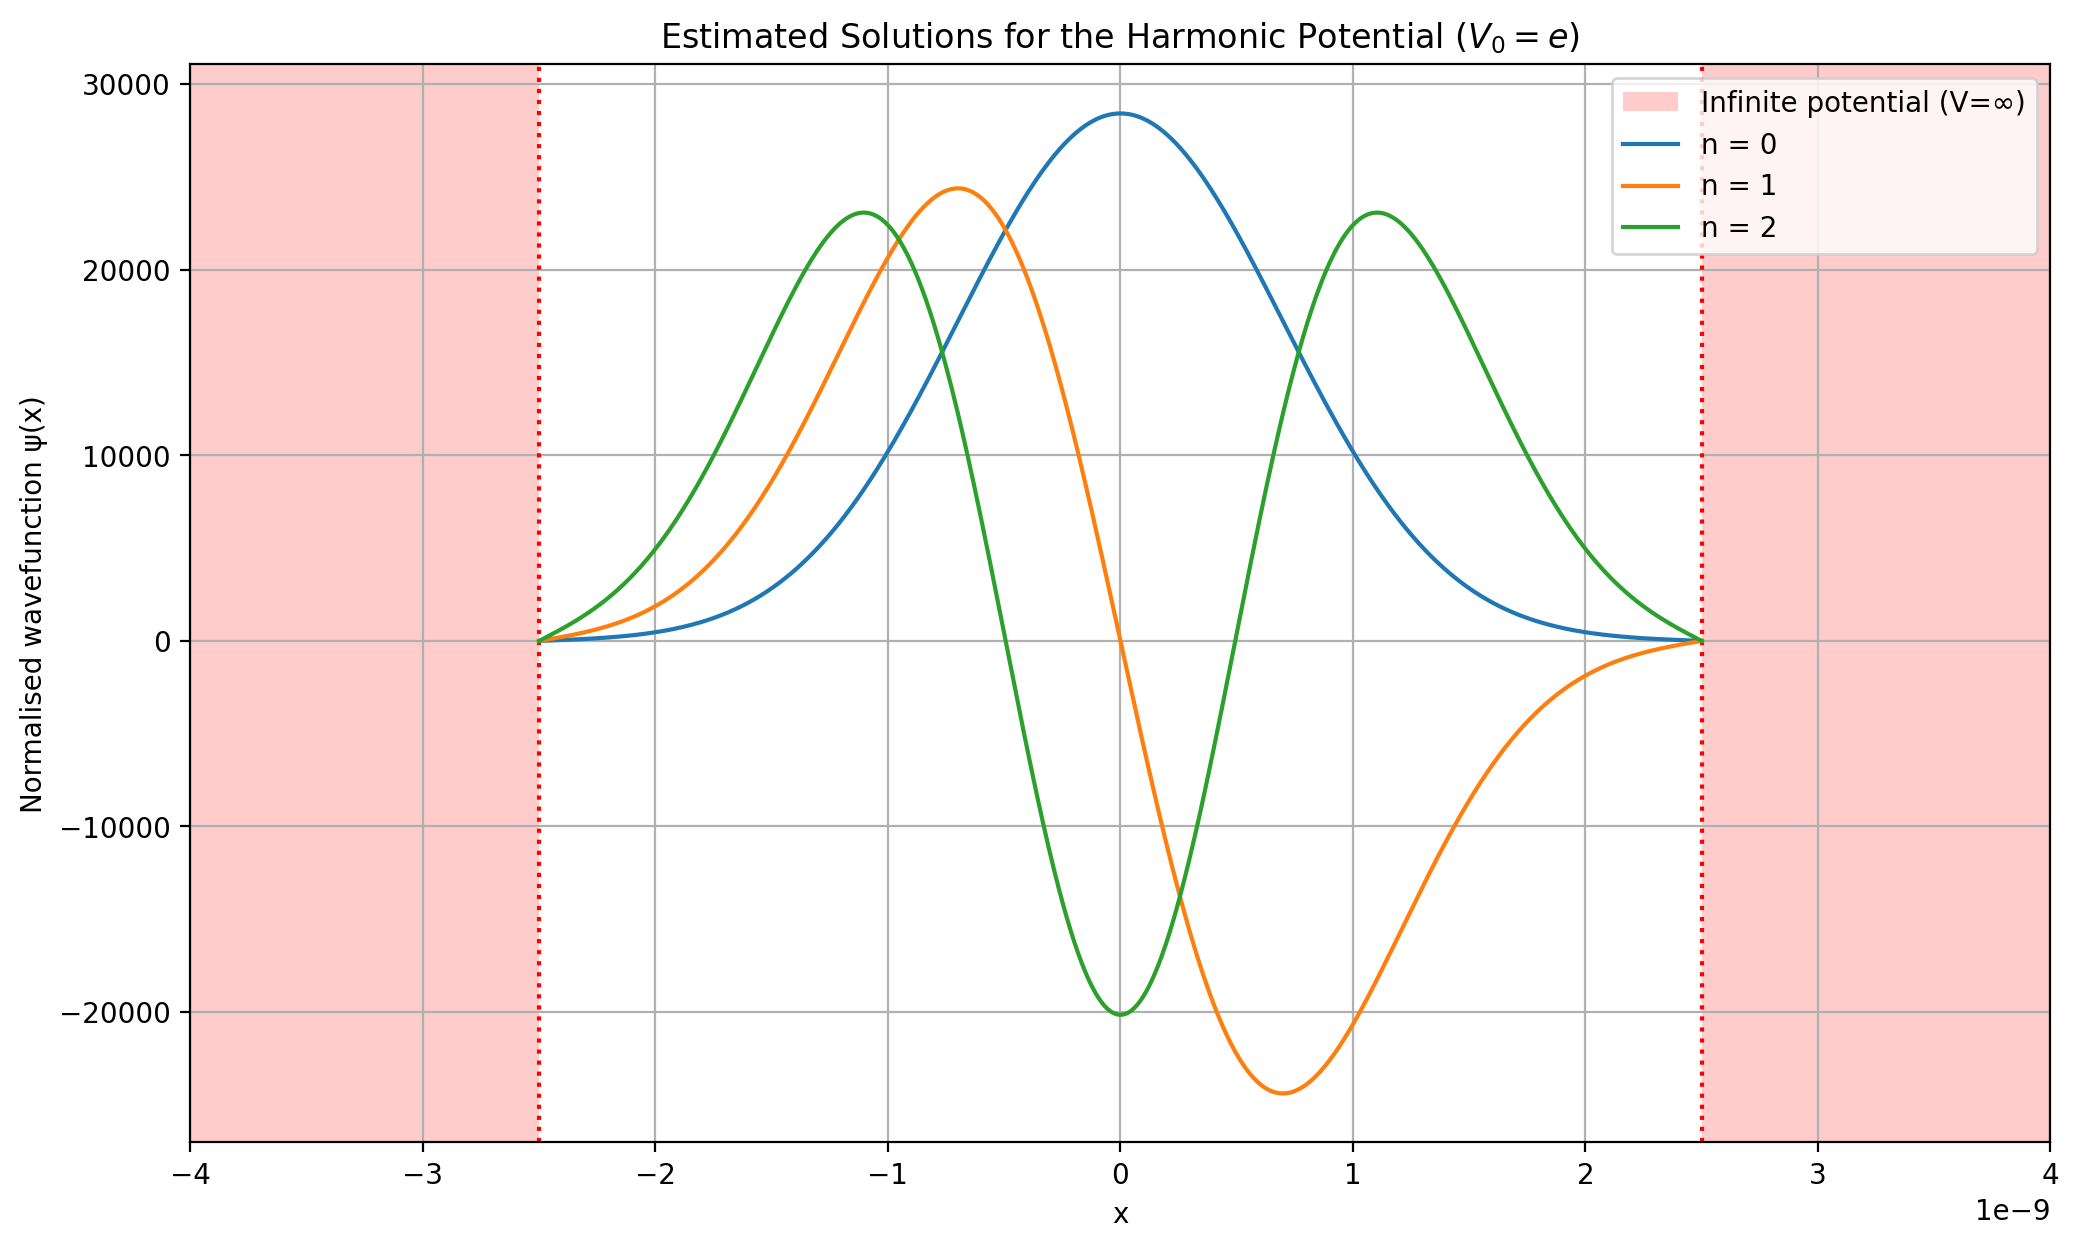

In [39]:
setup_plot(r'Estimated Solutions for the Harmonic Potential ($V_0 = e$)', 'x') 

# Plot the estimated solutions (n=0,1,2)
for i in range(0, 3):
   
    guess = harmonic_energy(i,1)
    
    eigenval = energy_guess(i, harmonic, guess, guess)
    
    psi = RK4(rhs_schrodinger, eigenval, harmonic)
    
    plt.plot(x_points, norm_psi(psi), label= f'n = {i}')
    plt.legend()

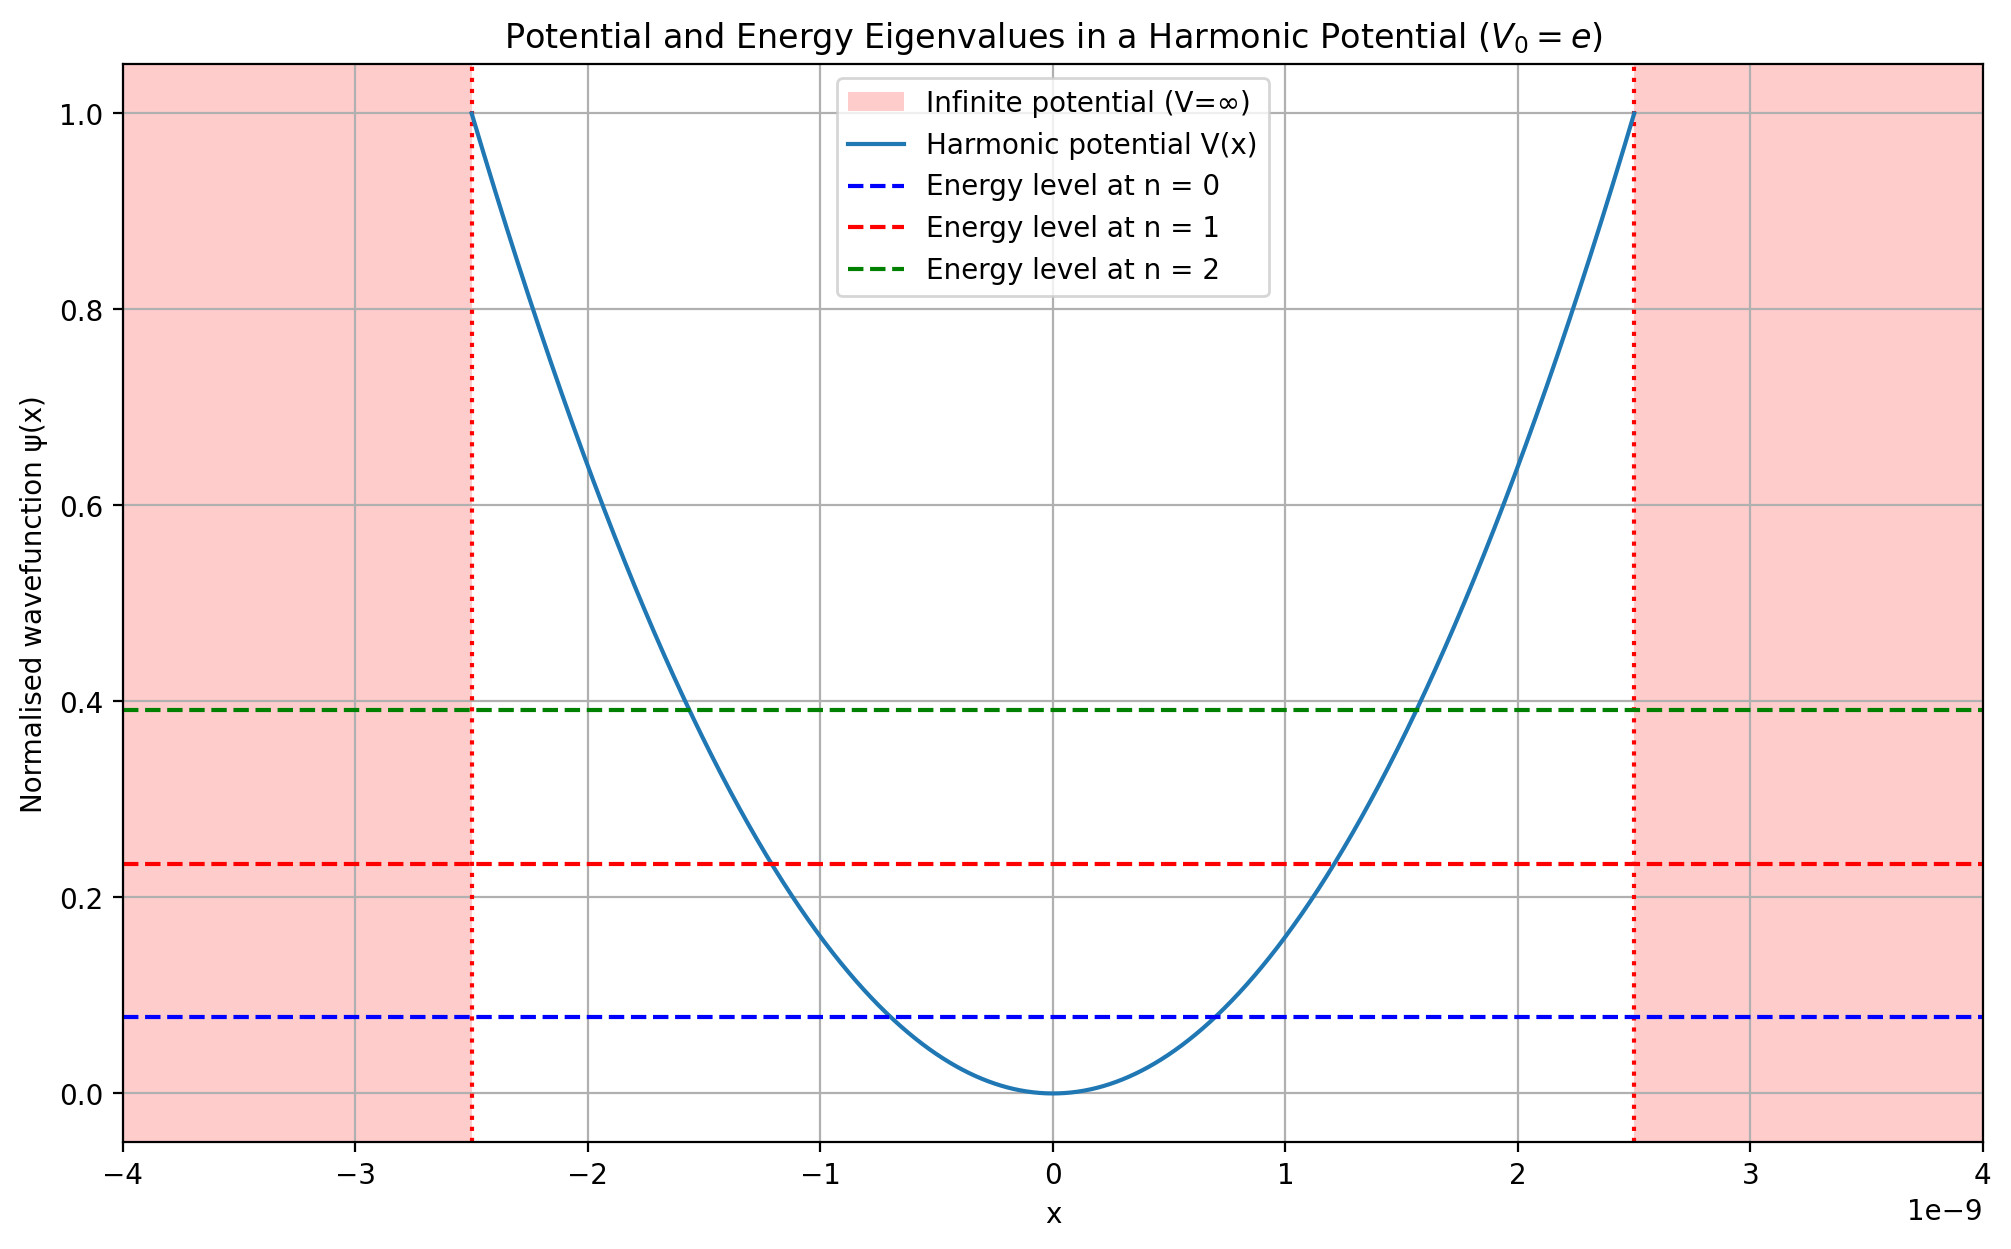

In [40]:
setup_plot(r'Potential and Energy Eigenvalues in a Harmonic Potential ($V_0 = e$)', 'x')

# Plot the potential curve in eV's
plt.plot(x_points, harmonic(x_points) / e , label='Harmonic potential V(x)')

# Plot the energy eigenvalues
for i in range(0, 3):
    
    # Array of colours to visualise the energy eigenvalues
    colors = ['red', 'green', 'blue']   
    
    # Compute eigenvalues
    guess = harmonic_energy(i,1)
    eigenval = energy_guess(i, harmonic, guess, guess)
    
    # Overlay eigenvalues as horizontal lines
    plt.axhline(y = eigenval /e , linestyle='--', color=colors[i-1], label=f'Energy level at n = {i}')
    plt.legend() 

#### Physical Observations when $V_0 = e$

When adjusting the characteristic potential, $V_0$ to $e$, the wavefunctions resemble the existing solutions for the quantum harmonic oscillator. Similar to the analytical solutions, the ground state wavefunction now exhibits a gaussian-like shape with increased number of nodes for higher $n$. At this potential, the wavefunction oscillates more naturally and converges closer the analytical solutions. For $n=1$ and $n=3$,  the wavefunction is a reflection in the x-axis of its existing solution due to the numerical solver sometimes computing negative values of the eigenfunction. 

Secondly, the computed eigenvalues are more suitable with the potential curve, causing them to be more physically significant. Unlike for a high potential, the wavefunctions do not decay rapidly, this avoids numerical errors during normalisation. At this potential, the wavefunction is well-behaved and physical observations can be yielded.

### II. Finite Square Well

In [43]:
# Update v0 to 600e 
v0 = 600*e

def finite(x):
    """
    Computes the potential energy, V(x) for a finite square well.
    
    Parameter
    ---------
    x (np.ndarray) : Position of the electron on the x-axis
    
    Returns
    -------
    Vx (np.ndarray): The potential energy at each discrete x position
    
    Notes
    -----
    . In a finite square well the boundary conditions are : Vx = 0 if -a/2 <= x <= a/2, and Vx = v0 if |x| >= a/2
    . Similar to the infinite square well, the ground state is defined at n=1
    
    """
    Vx = np.where(np.abs(x) > a/2, v0, 0.0)    # If |x| > a/2 then Vx = v0 
    
    return Vx    

In [61]:
def finite_sol(E, parity='even'):
    """
    Corrected transcendental equation for finite square well.
    Args:
        E (float): Energy (J)
        parity (str): 'even' or 'odd' parity state
    Returns:
        float: lhs - rhs of the transcendental equation
    """
    k = np.sqrt(2 * m * E) / h_bar
    kappa = np.sqrt(2 * m * (v0 - E)) / h_bar
    
    # Corrected arguments
    arg_kappa = kappa * (a - a/2)      # Distance from finite well edge to infinite wall (a/2)
    arg_k = k * (a/2)                  # Half-width of finite well (a/2)
    
    if parity == 'even':
        lhs = kappa * np.tanh(arg_kappa)
        rhs = k * np.tan(arg_k)
    else:
        lhs = kappa * np.tanh(arg_kappa)
        rhs = -k / np.tan(arg_k)       # cot = 1/tan
    
    return lhs - rhs

# Secant method to find roots
def secant_method(f, x0, x1, max_iter=100):
    
    tol=e/100000
    
    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0 + 1e-12)
        if abs(x_new - x1) < tol:
            return x_new
        x0, x1 = x1, x_new
    return x1

In [58]:
def construct_wavefunction(E, parity):
    """
    Builds normalized wavefunction for a given energy and parity.
    Args:
        E (float): Energy (J)
        parity (str): 'even' or 'odd'
    Returns:
        np.ndarray: Wavefunction ψ(x) normalized to ∫|ψ|²dx = 1
    """
    k = np.sqrt(2 * m * E) / h_bar
    kappa = np.sqrt(2 * m * (v0 - E)) / h_bar
    a_finite = a/2  # Half-width of finite well
    
    # Initialize wavefunction
    psi = np.zeros_like(x_points)
    
    # Inside finite well (|x| ≤ a/2)
    mask_inside = np.abs(x_points) <= a_finite
    x_inside = x_points[mask_inside]
    
    if parity == 'even':
        psi_inside = np.cos(k * x_inside)
    else:
        psi_inside = np.sin(k * x_inside)
    
    # Outside finite well (a/2 < |x| ≤ a)
    mask_outside = ~mask_inside
    x_outside = x_points[mask_outside]
    decay_distance = a - np.abs(x_outside)  # Distance to infinite wall
    
    # Match boundary condition at x = a/2
    B = psi_inside[-1] / np.sinh(kappa * (a - a_finite))
    psi_outside = B * np.sinh(kappa * decay_distance)
    
    # Combine regions
    psi[mask_inside] = psi_inside
    psi[mask_outside] = psi_outside
    
    return psi 

In [59]:
# Print eigenstates for the finite square well
for i in range(1,4): # For n = 1,2,3
    
    # Find even and odd parity energies
    E_initial_guess1 = 0.1 * v0
    E_initial_guess2 = 0.5 * v0
    
    
    # Compute analytical solution (eigenvector of the hamiltonian)
    E_even = secant_method(lambda E: finite_sol(E, 'even'), E_initial_guess1, E_initial_guess2)
    E_odd = secant_method(lambda E: finite_sol(E, 'odd'), E_initial_guess1, E_initial_guess2)
    
    # Get wavefunctions
    psi_even = construct_wavefunction(E_even, 'even')
    psi_odd = construct_wavefunction(E_odd, 'odd')

    
    eigenval = energy_guess(i,finite,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Even parity energy : {E_even / e } eV')
    print(f' . Odd parity energy  : {E_odd / e } eV')
    
     
    print(f'For n = {i}:')
    print(f' . Even parity eigenfunction: {norm_psi(psi_even)[ : 8]} ')
    print(f' . Odd parity eigenfunction : {norm_psi(psi_odd)[ : 8]} ')
    
    print('--------------------------------------------------')

AttributeError: module 'numpy' has no attribute 'cot'

In [0]:
# Print eigenstates for the finite square well
for i in range(1,4): # For n = 1,2,3
    
    # Compute analytical solution (eigenvector of the hamiltonian)
    guess = matrix(i,finite)
    
    eigenval = energy_guess(i,finite,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {eigenval / e } eV')
    print(f' . Known energy eigenvalue is:     {guess / e } eV')
    print(f' . Relative error (energies): {error(eigenval , guess)}')
    
    
    psi = RK4(rhs_schrodinger , eigenval , finite)
    psi_known = RK4(rhs_schrodinger , guess , finite)
    psi1= finite_solution(i)[1]
     
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction is: {norm_psi(psi)[ : 8]} ')
    print(f' . Known wavefunction is:     {(psi1)[ : 8]} ')
    
    print('--------------------------------------------------')
    

In [0]:
def setup_plot_finite(title,xlabel):
    
    """
    Sets up the plot for visualising the normalised wavefunction solutions for the finite square well. It adds shaded regions 
    displaying the boundary conditions within the infinite square well.
    
    Parameters
    ----------
    title(str) : Title of the plot
    xlabel(str): The x label for the plot
    
    Notes
    -----
    This function calls the setup_plot function
    
    """
    
    setup_plot(title, xlabel)
    
    # Lines displaying boundary conditions for the finite square well
    plt.axvline(-a/2, color='blue', linestyle='dotted', linewidth=1.5)
    plt.axvline(a/2, color='blue', linestyle='dotted', linewidth=1.5)
   
    # shade regions of infinite potential
    plt.axvspan(-1.6*a, -a/2, facecolor='blue', alpha=0.2, label=r'Potential ($V_0$)')
    plt.axvspan(a/2, 1.6*a, facecolor='blue', alpha=0.2)

In [0]:
setup_plot_finite(r'Analytical Solutions for the Finite Square Well ($V_0 = 600e$)','x(m)')

# Plot the analytical solutions (n=1,2,3)
for i in range(1, 4):
    
    # Calculate analytical eigenfunction
    eigenval, eigenvec = finite_solution(3) # lowest 3 eigenstate
        
    psi = eigenvec[:, i-1] # take i-1 th column as the eigenfunction
    
    plt.plot(x_points, psi, label= f'n = {i}')
    plt.legend()

In [0]:
setup_plot_finite(r'Estimates Solutions for the Finite Square Well ($V_0 = 600e$)','x(m)')

# Plot the estimated solutions (n=1,2,3)
for i in range(1, 4):
   
    guess = matrix(i, finite)
    
    # Find the eigenstates
    eigenvalue = energy_guess(i, finite, guess, guess)
    psi = RK4(rhs_schrodinger , eigenvalue , finite)
    
    plt.plot(x_points, norm_psi(psi), label= f'n = {i}')
    plt.legend()

In [0]:
setup_plot_finite(r'Potential and Energy Eigenvalues for a Finite Square Well ($V_0 = 600e$)','x(m)')

# Plot the potential curve in eV's
plt.plot(x_points, finite(x_points) / e , label='Finite Square Well')

# Plot the energy eigenvalues (n=1,2,3)
for i in range(1, 4):
    
    # Array of colours to visualise the energy eigenvalues
    colors = ['red', 'green', 'blue']   
    
    # Compute eigenvalue
    guess = harmonic_energy(i)
    eigenval = energy_guess(i, harmonic, guess, guess)
    
    # Overlay eigenvalues as horizontal lines
    plt.axhline(y = eigenval /e , linestyle='--', color=colors[i-1], label=f'Energy level at n = {i}')
    plt.legend() 

#### Analysis of the Results

When the finite square well is embedded within the infinite square well, the analytical solutions shape resemble closely to the solutions of the harmonic potential - the number of nodes increases for a higher $n$. Furthermore, the estimated solutions closely resemble the ones embedded in a harmonic potential, and this reinforces the idea that a large $V_0$ value can cause the wavefunction to decay rapidly towards zero. However, unlike the harmonic potential - the potential cuts off at a certain points, meaning the solutions shape do not exhibit smooth and long tails. It can be observed that as $n$ increases, the amplitude of the normalised wavefunction decreases, this is because in a higher $n^{th}$ state the electron has more kinetic energy causing its wavefunction to spread out - to maintain normalisation the amplitude has to decrease.

The accuracy of the Secant method decreases when solving for this system, previously - the relative errors were on orders of approximately $10^{-8}$; and has now increased to $10{-4}$. This discrepancy arises because, unlike the infinite square well and harmonic potential, the finite square lacks a well-known analytical solution. Despite the discrepancy, the Secant method still remains highly accurate - confirming that matrix discretisation is a suitable method for guessing eigenvalues in systems, regardless if analytical solutions exist.

The high potential also causes the electron to lie deep within the well, causing the energy eigenvalues to be insignificant compared to the height of the potential well. This decreases the probability of quantum tunnelling due to the greater confinement of the wavefunction within the potential well. 

In [0]:
# Reset v0 to e
v0 = e

for i in range(1,4): # For n = 1,2,3
    
    # Compute analytical solution (eigenvector of the hamiltonian)
    guess = matrix(i,finite)
    
    eigenval = energy_guess(i,finite,guess,guess)    
    
    print(f'For n = {i}:')
    print(f' . Estimated energy eigenvalue is: {eigenval / e } eV')
    print(f' . Known energy eigenvalue is:     {guess / e } eV')
    print(f' . Relative error (energies): {error(eigenval , guess)}')
    
    
    psi = RK4(rhs_schrodinger , eigenval , finite)
    psi_known = RK4(rhs_schrodinger , guess , finite)
    psi1= finite_solution(i)[1]
     
    print(f'For n = {i}:')
    print(f' . Estimated wavefunction is: {norm_psi(psi)[ : 8]} ')
    print(f' . Known wavefunction is:     {(psi1)[ : 8]} ')
    
    print('--------------------------------------------------')
    

In [0]:
setup_plot_finite(r'Analytical Solutions for the Finite Square Well ($V_0 = e$)','x(m)')

# Plot the analytical solutions (n=1,2,3)
for i in range(1, 4):
    
    # Calculate analytical eigenfunction
    eigenval, eigenvec = finite_solution(3) # lowest 3 eigenstate
        
    psi = eigenvec[: , (i-1)] # take i-1 th column as the eigenfunction
    
    plt.plot(x_points, psi, label= f'n = {i}')
    plt.legend(loc='best')

In [0]:
setup_plot_finite(r'Estimates Solutions for the Finite Square Well ($V_0 = e$)','x(m)')

# Plot the estimated solutions (n=1,2,3)
for i in range(1, 4):
   
    guess = matrix(i, finite)
    
    # Find the eigenstates
    eigenvalue = energy_guess(i, finite, guess, guess)
    psi = RK4(rhs_schrodinger , eigenvalue , finite)
    
    plt.plot(x_points, norm_psi(psi), label= f'n = {i}')
    plt.legend()

In [0]:
setup_plot_finite(r'Potential and Energy Eigenvalues for a Finite Square Well ($V_0 = e$)','x(m)')

# Plot the potential curve in eV's
plt.plot(x_points, finite(x_points) / e , label='Finite Square Well')

# Plot the energy eigenvalues (n=1,2,3)
for i in range(1, 4):
    
    # Array of colours to visualise the energy eigenvalues
    colors = ['red', 'green', 'blue']   
    
    # Compute eigenvalue
    guess = harmonic_energy(i)
    eigenval = energy_guess(i, harmonic, guess, guess)
    
    # Overlay eigenvalues as horizontal lines
    plt.axhline(y = eigenval /e , linestyle='--', color=colors[i-1], label=f'Energy level at n = {i}')
    plt.legend() 

#### Physical Observations when $V_0=e$

For a lower potential, the analytical solution remain unchanged while the estimated solutions experienced changes, as expected. The eigenfunction's shape now resembles more like the solutions for the harmonic potential: longer, smoother tails and sharper peaks - due to the potential barriers becoming more penetrable. 

## Bibliography
- Ramalingam, G. Kathirgamanathan, P. Ravi, G. Elangovan, T. Arjun kumar, B. Manivannan, N. Kaviyarasu, K. 2020. "Quantum Confinement". \[Online\] Brunel University Research Archive. Available from: https://bura.brunel.ac.uk/bitstream/2438/20190/1/FullText.pdf [Accessed 15th March 2025]

- Schroeder, D.V. 2025. "The Schrödinger Equations". \[Online\] Weber State University. Available from: https://physics.weber.edu/schroeder/quantum/Schrodinger.pdf \[Accessed 16th March 2025\]

- Dash, L. 2020. " PHAS0029 Final Assignment 2020". \[Online\] UCL Moodle resource. Available from:  https://moodle.ucl.ac.uk/course/view.php?id=6766&section=14 \[accessed 6th February 2020\]

- Rae, Alastair I. M. 2002. _"Quantum mechanics"_. Fourth edition. Bristol: Institute of Physics publishing. 